# import packages

In [1]:
import __init__  # noqa: F401
from catboost import CatBoostRegressor

from scripts.main import EnsembleModelComparison as CatBoostModel
from scripts.main import cols

# Load and preprocess data

In [2]:
cat_boost = CatBoostModel()

INFO:root:20250225153153: function: _load_data, df shape: (678013, 12)
INFO:root:20250225153153: function: cast_cols_to_int, df shape: (678013, 12)
INFO:root:20250225153153: function: remove_char_from_cols, df shape: (678013, 12)
INFO:root:20250225153153: function: _kupierung, df shape: (678013, 12)
INFO:root:20250225153153: function: _kupierung, df shape: (678013, 12)
INFO:root:20250225153153: function: _kupierung, df shape: (678013, 12)
INFO:root:20250225153153: function: main, df shape: (678013, 12)
INFO:root:20250225153154: function: _load_data, df shape: (26639, 2)
INFO:root:20250225153154: function: cast_cols_to_int, df shape: (26639, 2)
INFO:root:20250225153154: function: _group_claims_by_policy_id, df shape: (24950, 2)
Number of claims above kupierung threshold 50000: 
94 out of 24950. 
Reset them to 50000. 
Applied factor 1.3354896937210312. 

Number of claims above kupierung threshold 50000: 
32 out of 24950. 
Reset them to 50000. 
Applied factor 1.0039093452026402. 

Number 

# Modeling

## Hyperparameter tuning

In [3]:
grid = {
    'learning_rate': [0.1, 0.15, 0.2, 0.3],
    'depth': [1, 2, 3],
    'l2_leaf_reg': [1, 2],
}

catboost_optimal = cat_boost.catboost_grid_search(grid=grid, model=CatBoostRegressor, logging_level='Silent')

{'depth': 2, 'learning_rate': 0.2, 'l2_leaf_reg': 1}
subset            train       test
metric                            
D² explained     0.0003     0.0001
MAE            310.3308   318.8819
RMSE          3016.1462  3769.3621


INFO:root:predicted full data: 166.2079824558013
INFO:root:observed full data: 168.53976515064443
INFO:root:total predicted full data: 59562310.12165072
INFO:root:total observed full data: 60397928.01409147
INFO:root:predicted test data: 166.30421364541357
INFO:root:observed test data: 174.07908216205226
INFO:root:total predicted test data: 17872071.011508934
INFO:root:total observed test data: 18707606.07817165
INFO:root:predicted train data: 166.1667634741622
INFO:root:observed train data: 166.16709359679436
INFO:root:total predicted train data: 41690239.11014177
INFO:root:total observed train data: 41690321.93591982


# plot observed vs predicted

## plot train data

INFO:root:feature: Area


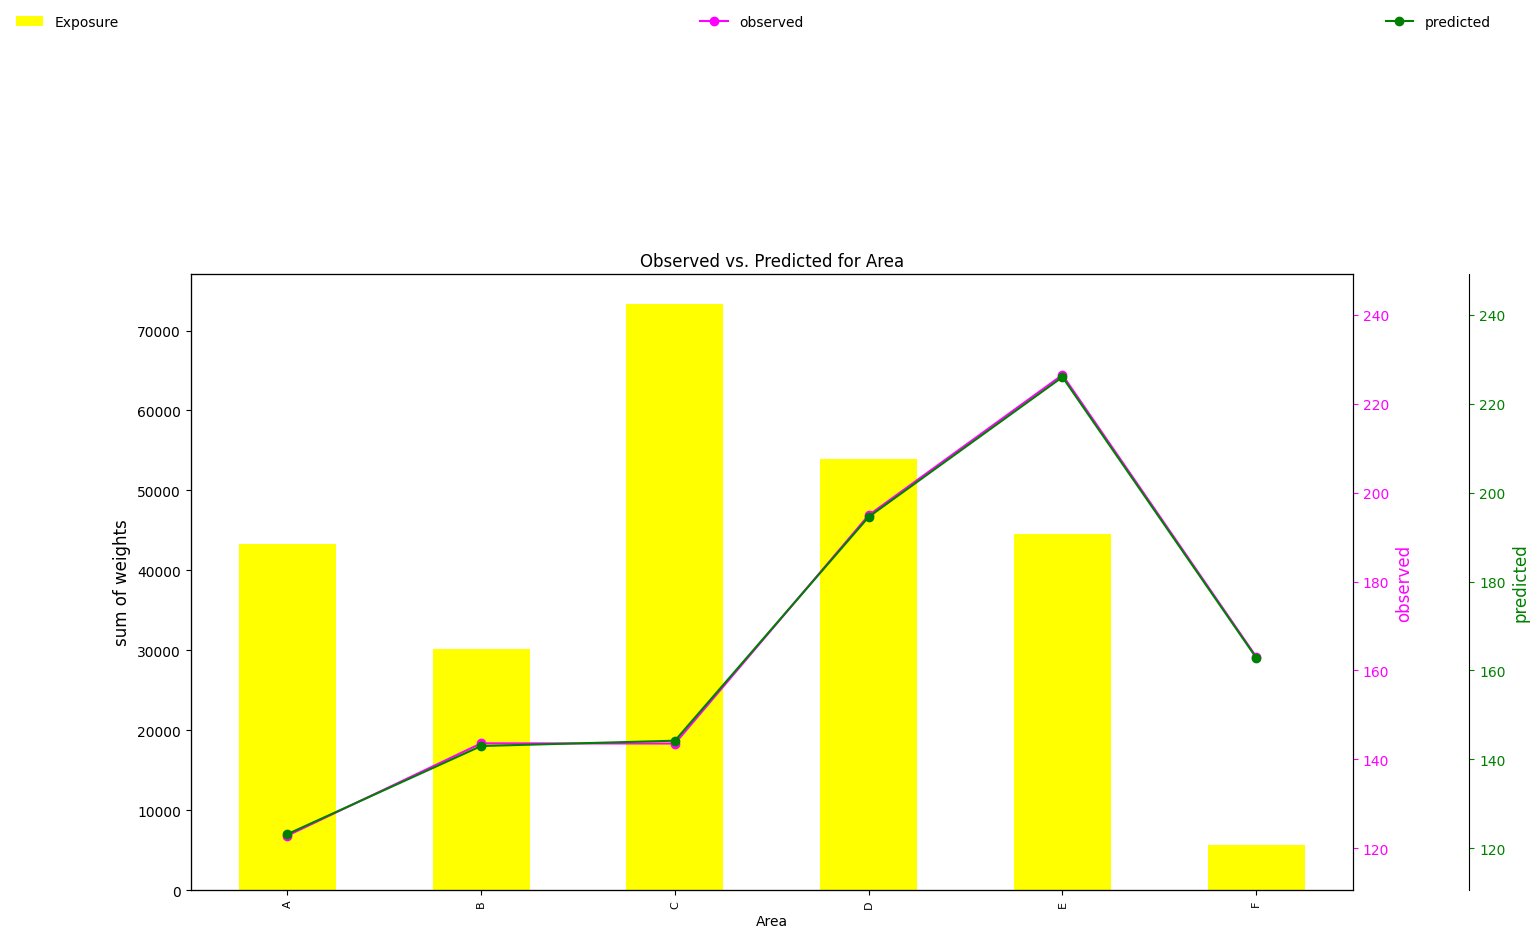

INFO:root:feature: BonusMalus


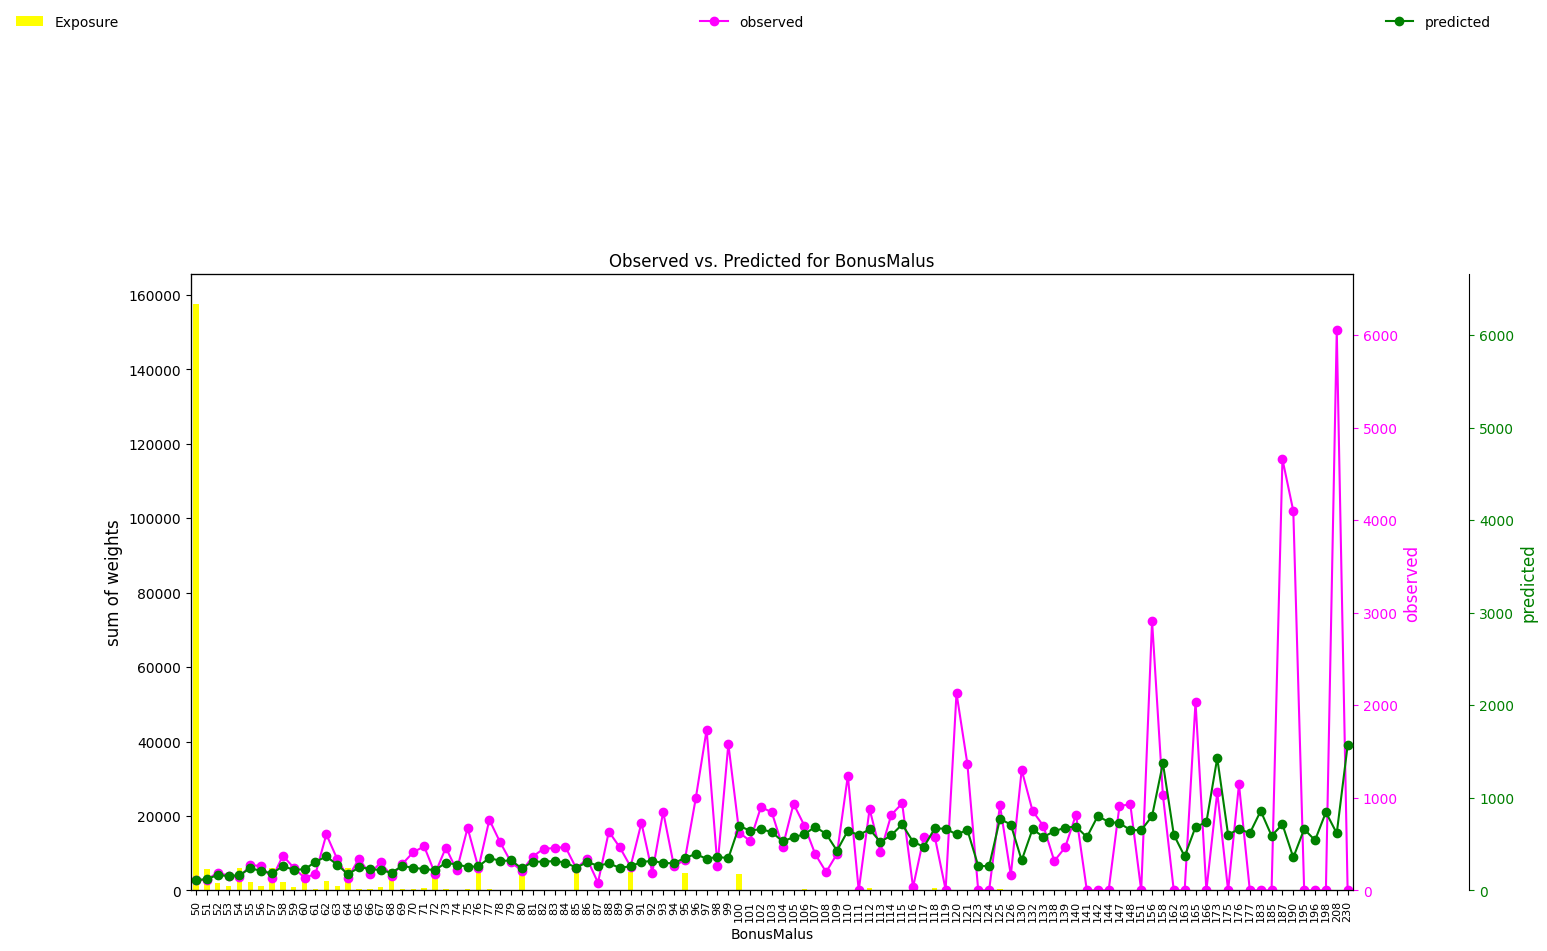

INFO:root:feature: bonus_malus_grouped


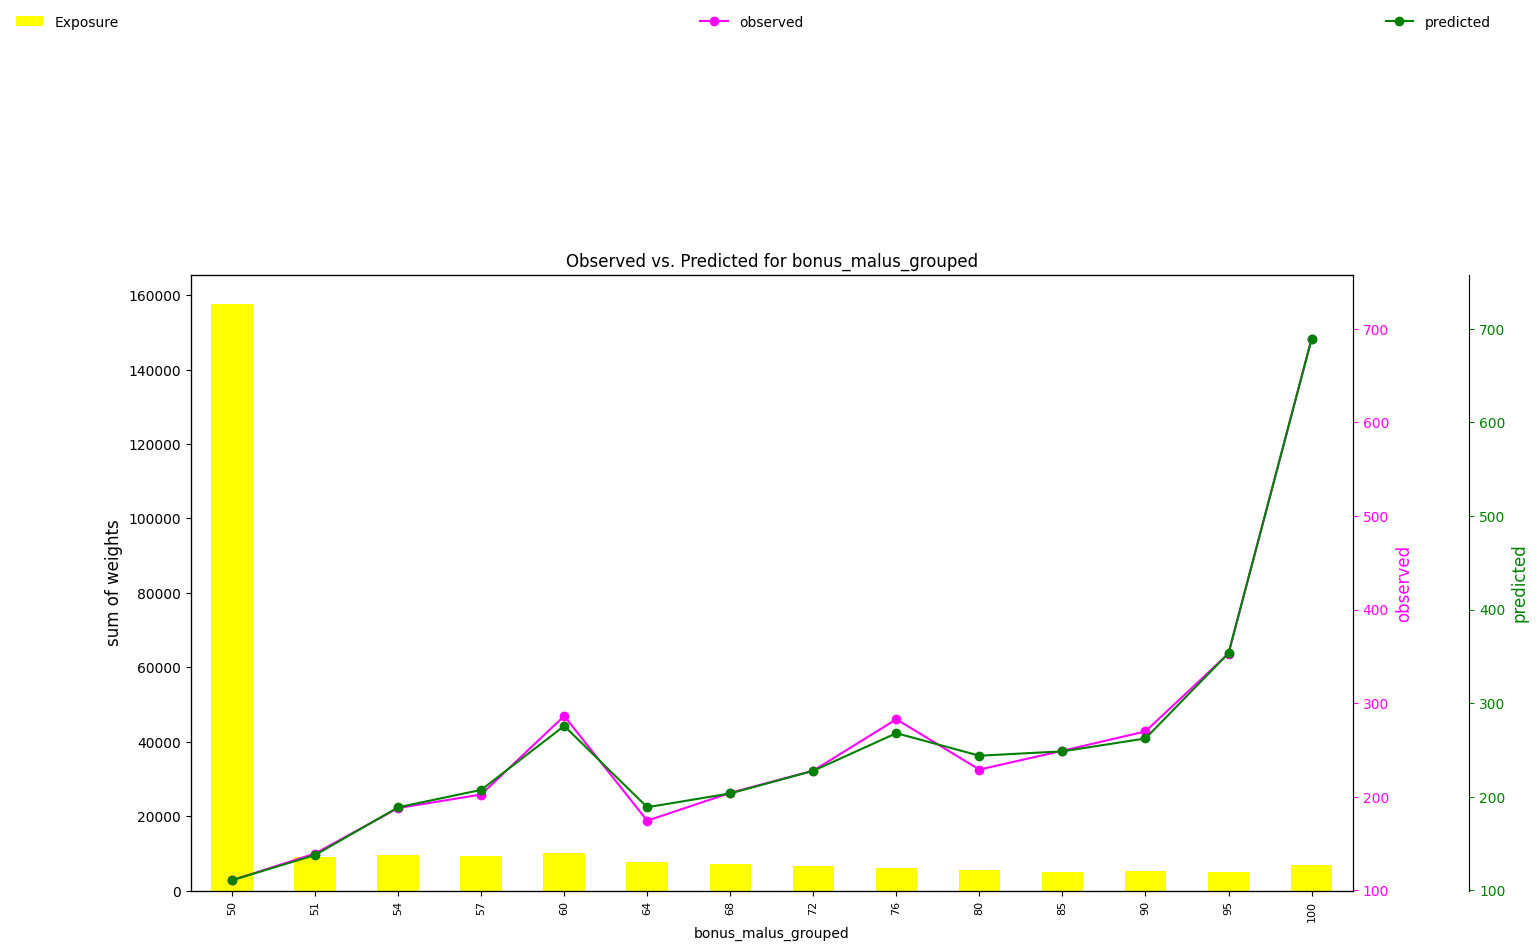

INFO:root:feature: Density


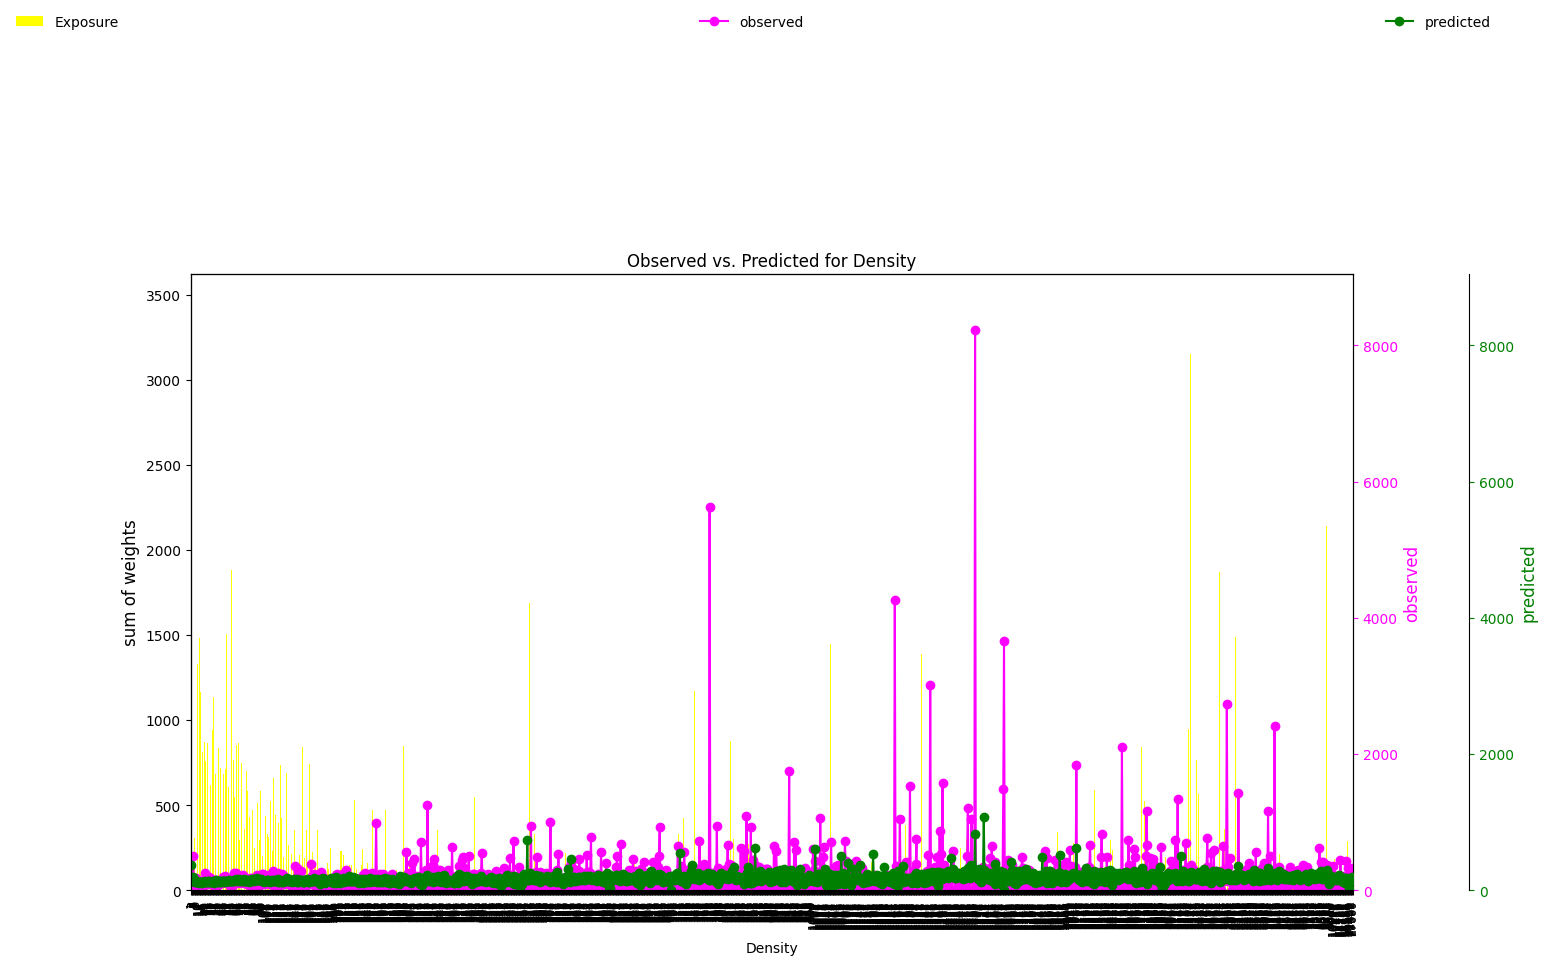

INFO:root:feature: density_grouped


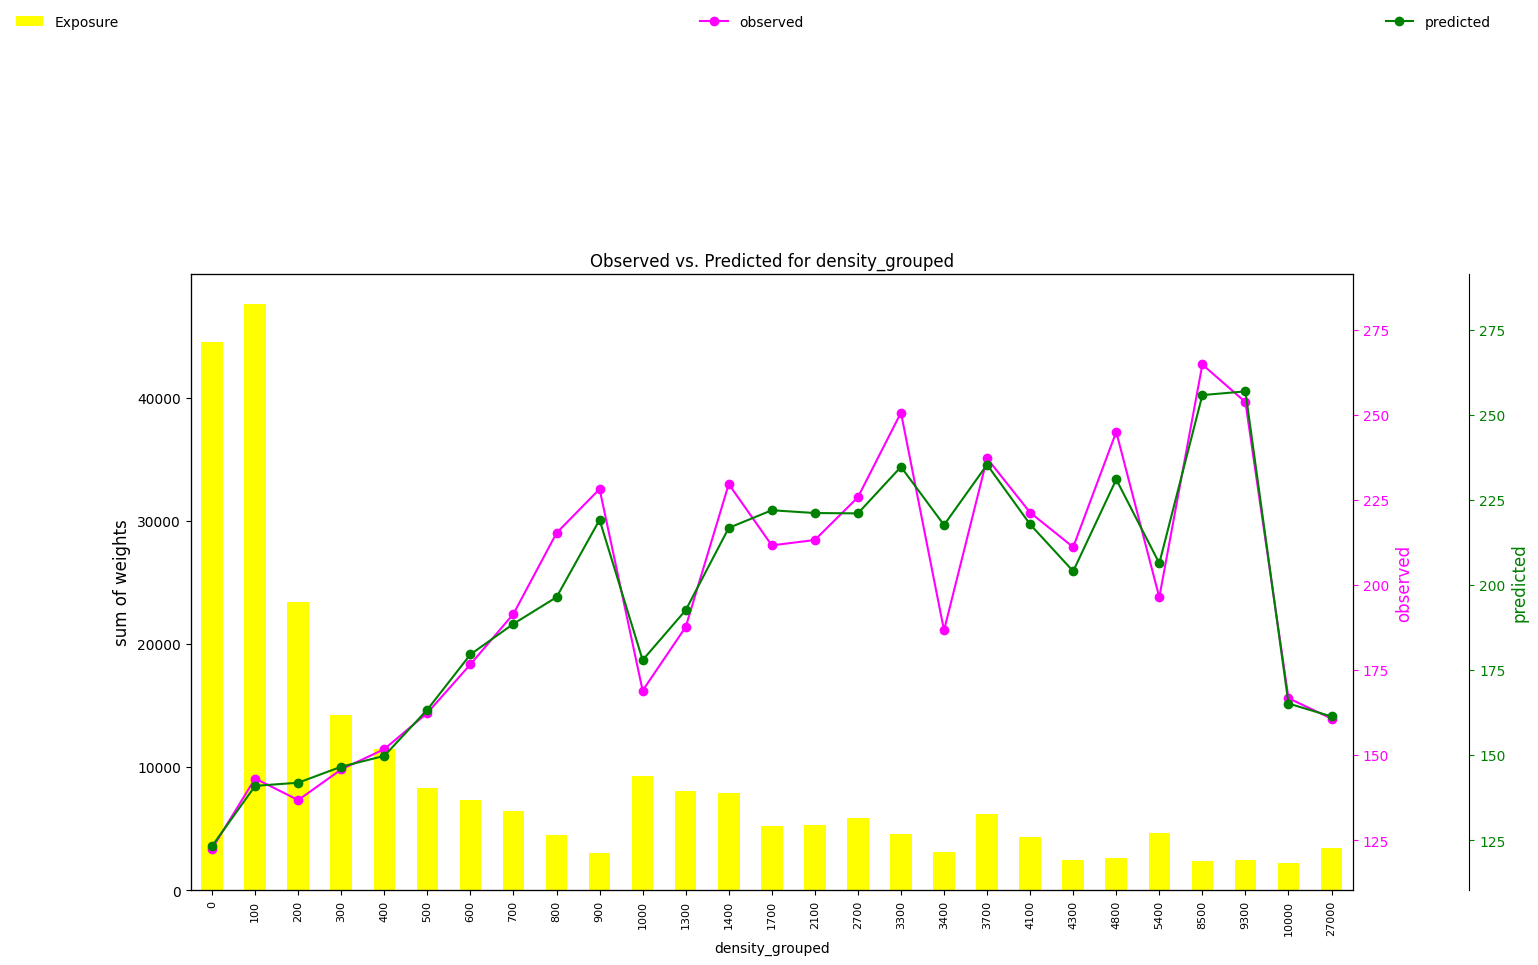

INFO:root:feature: DrivAge


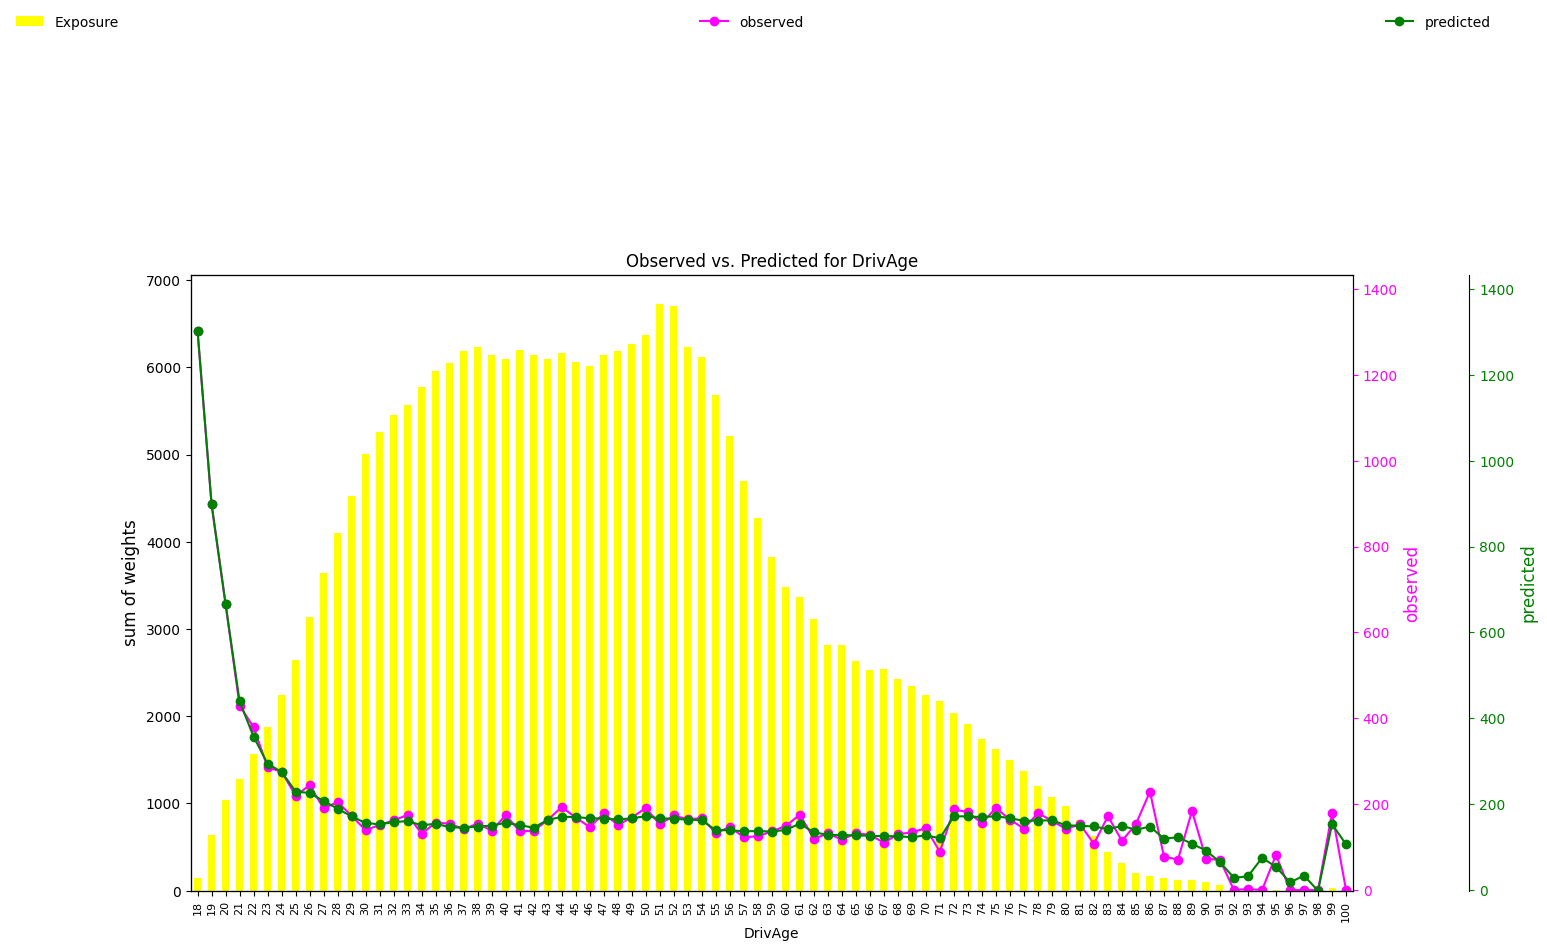

INFO:root:feature: Region


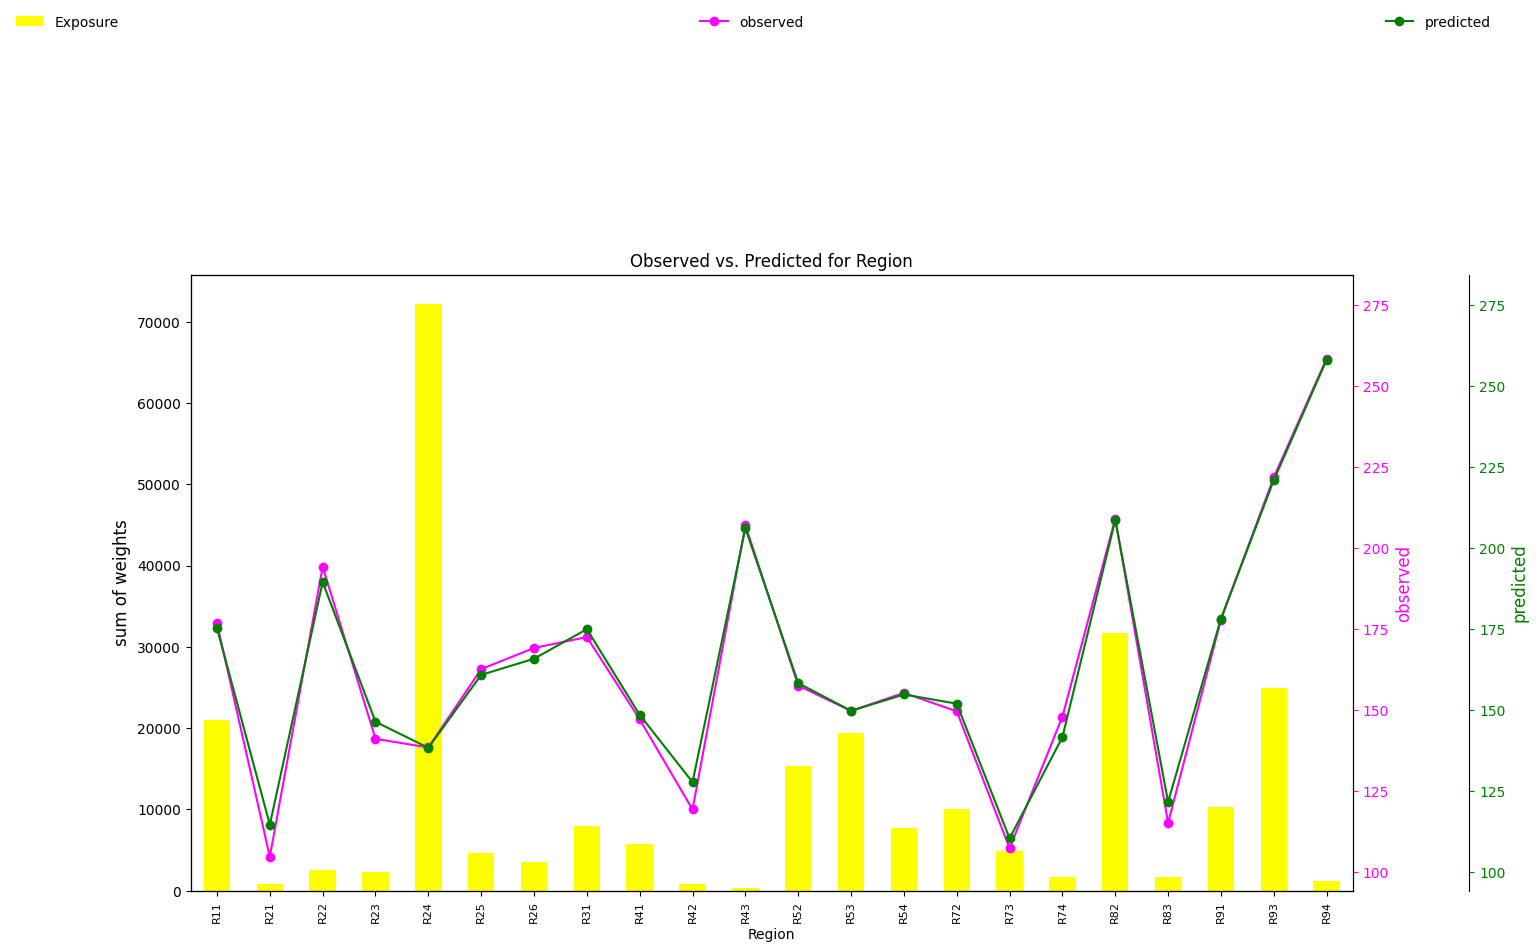

INFO:root:feature: VehAge


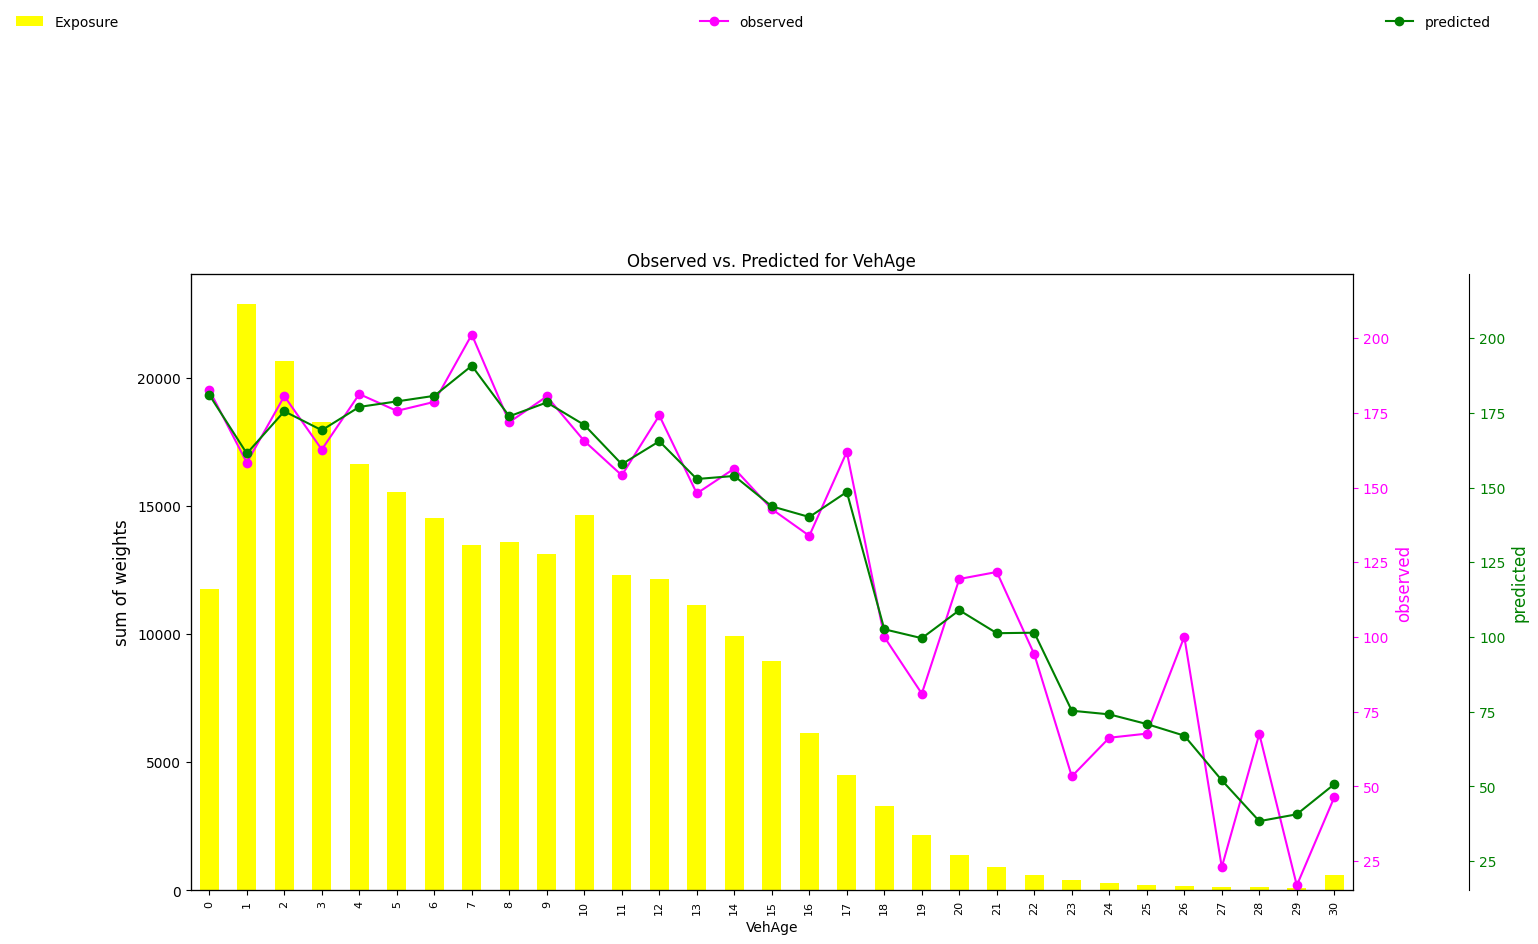

INFO:root:feature: VehBrand


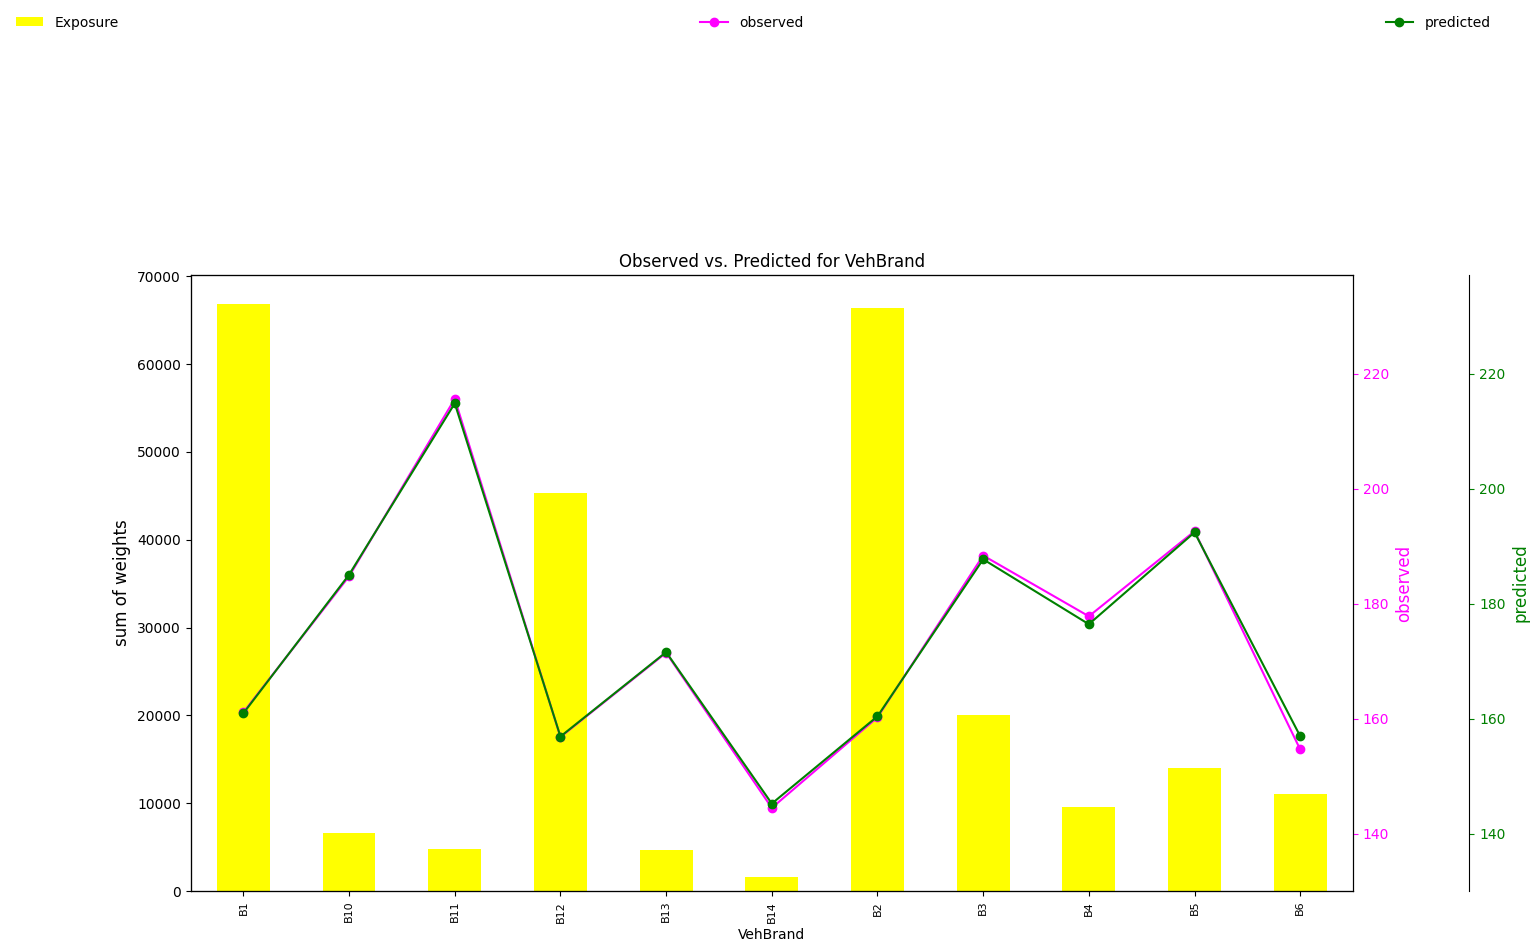

INFO:root:feature: VehGas


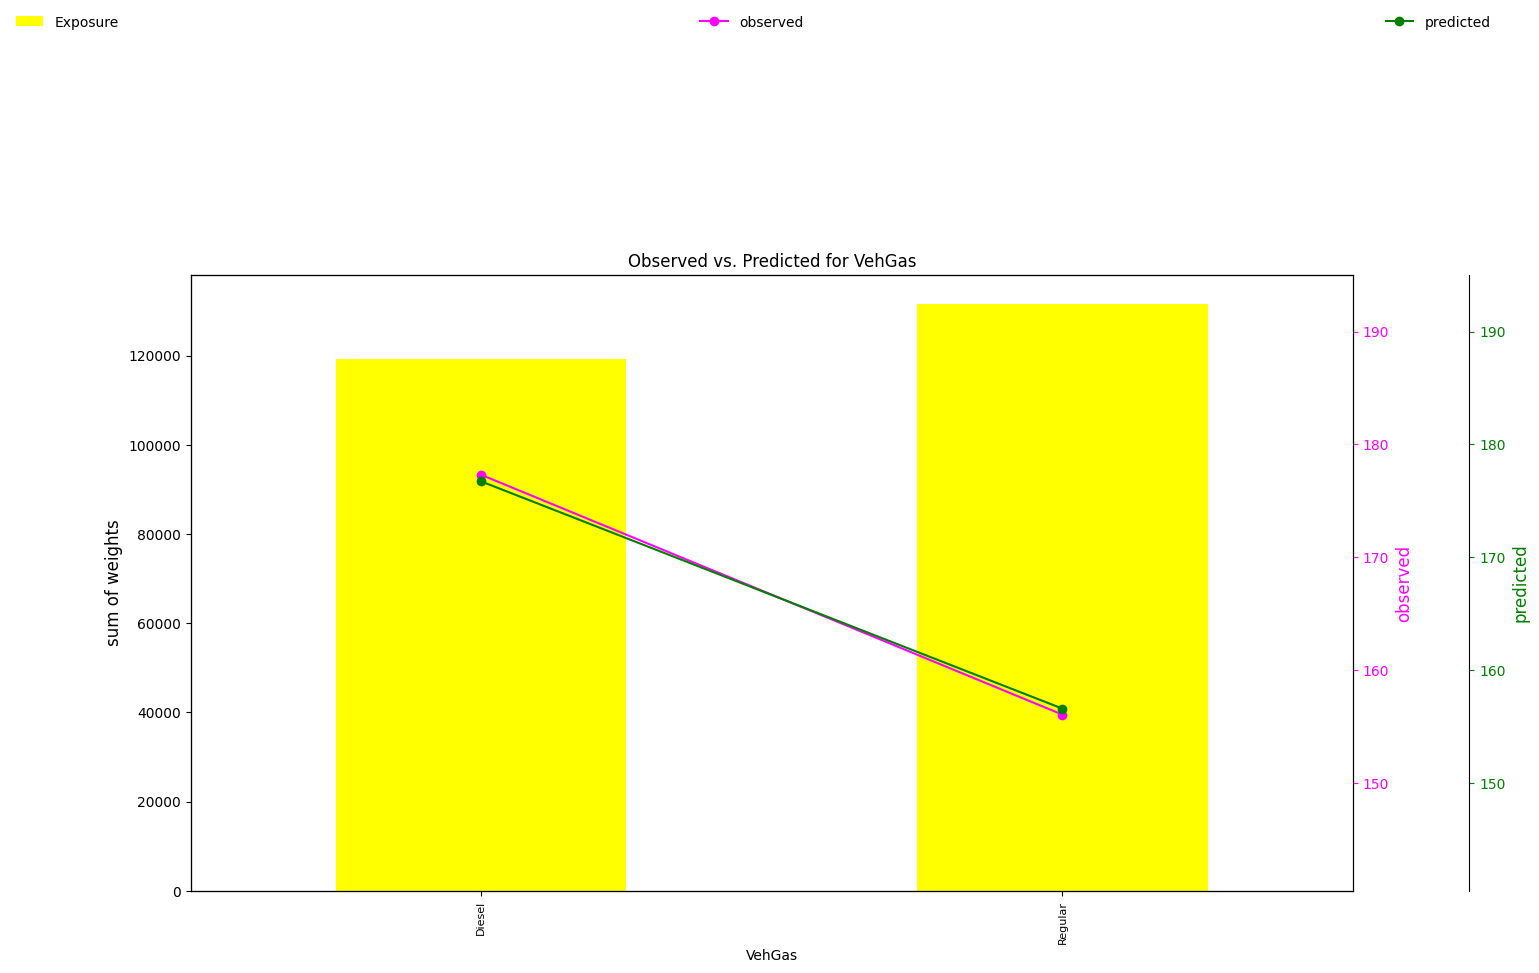

INFO:root:feature: VehPower


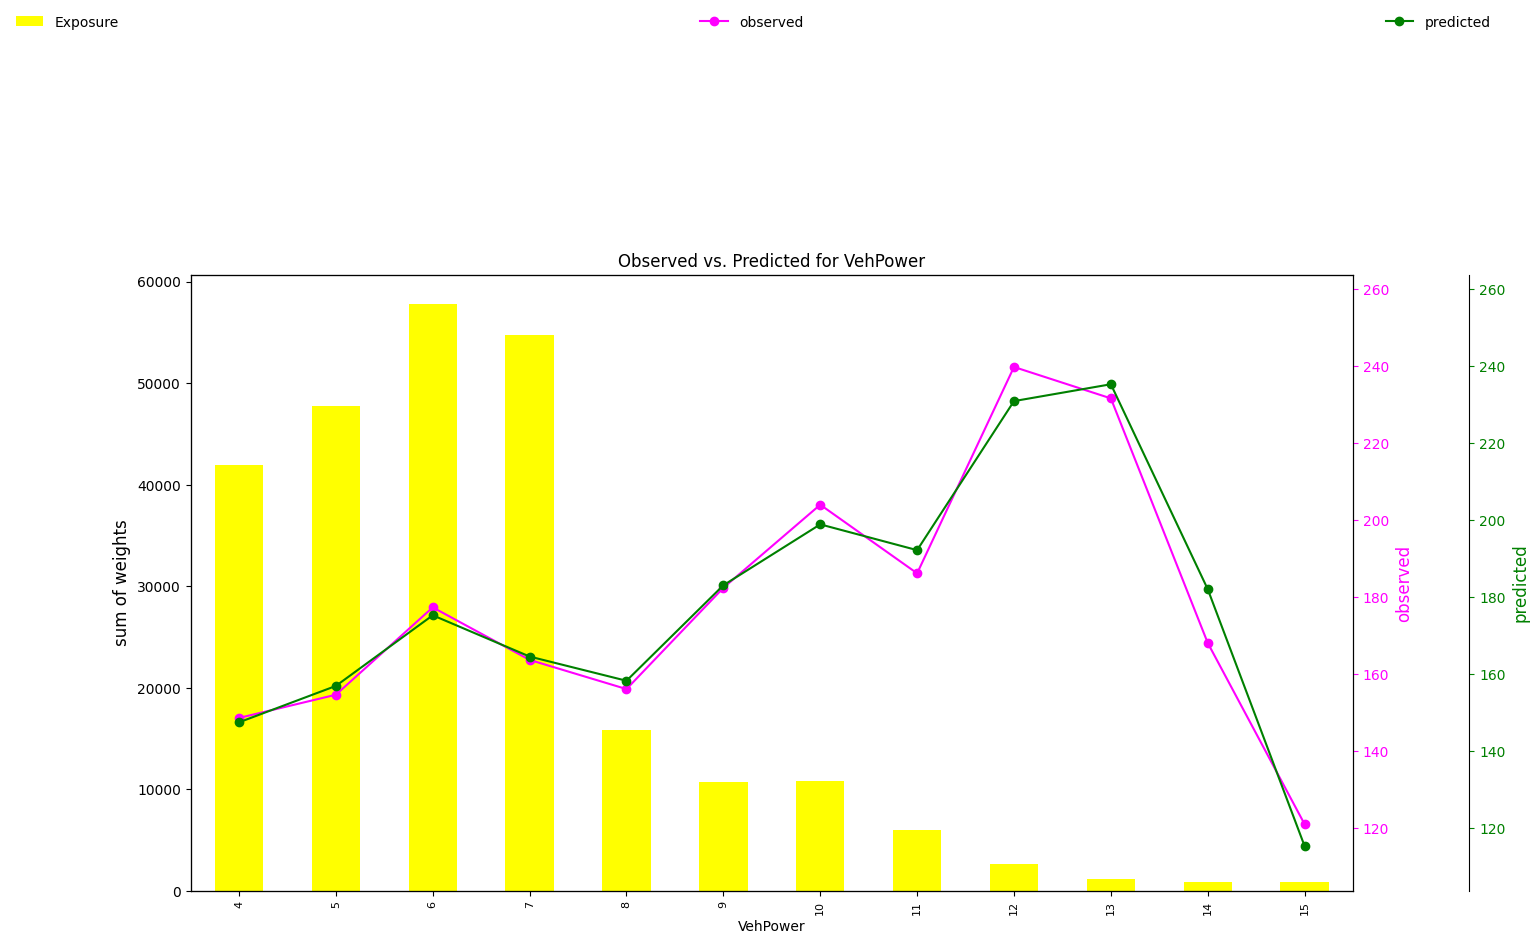

INFO:root:feature: veh_power_x_veh_gas


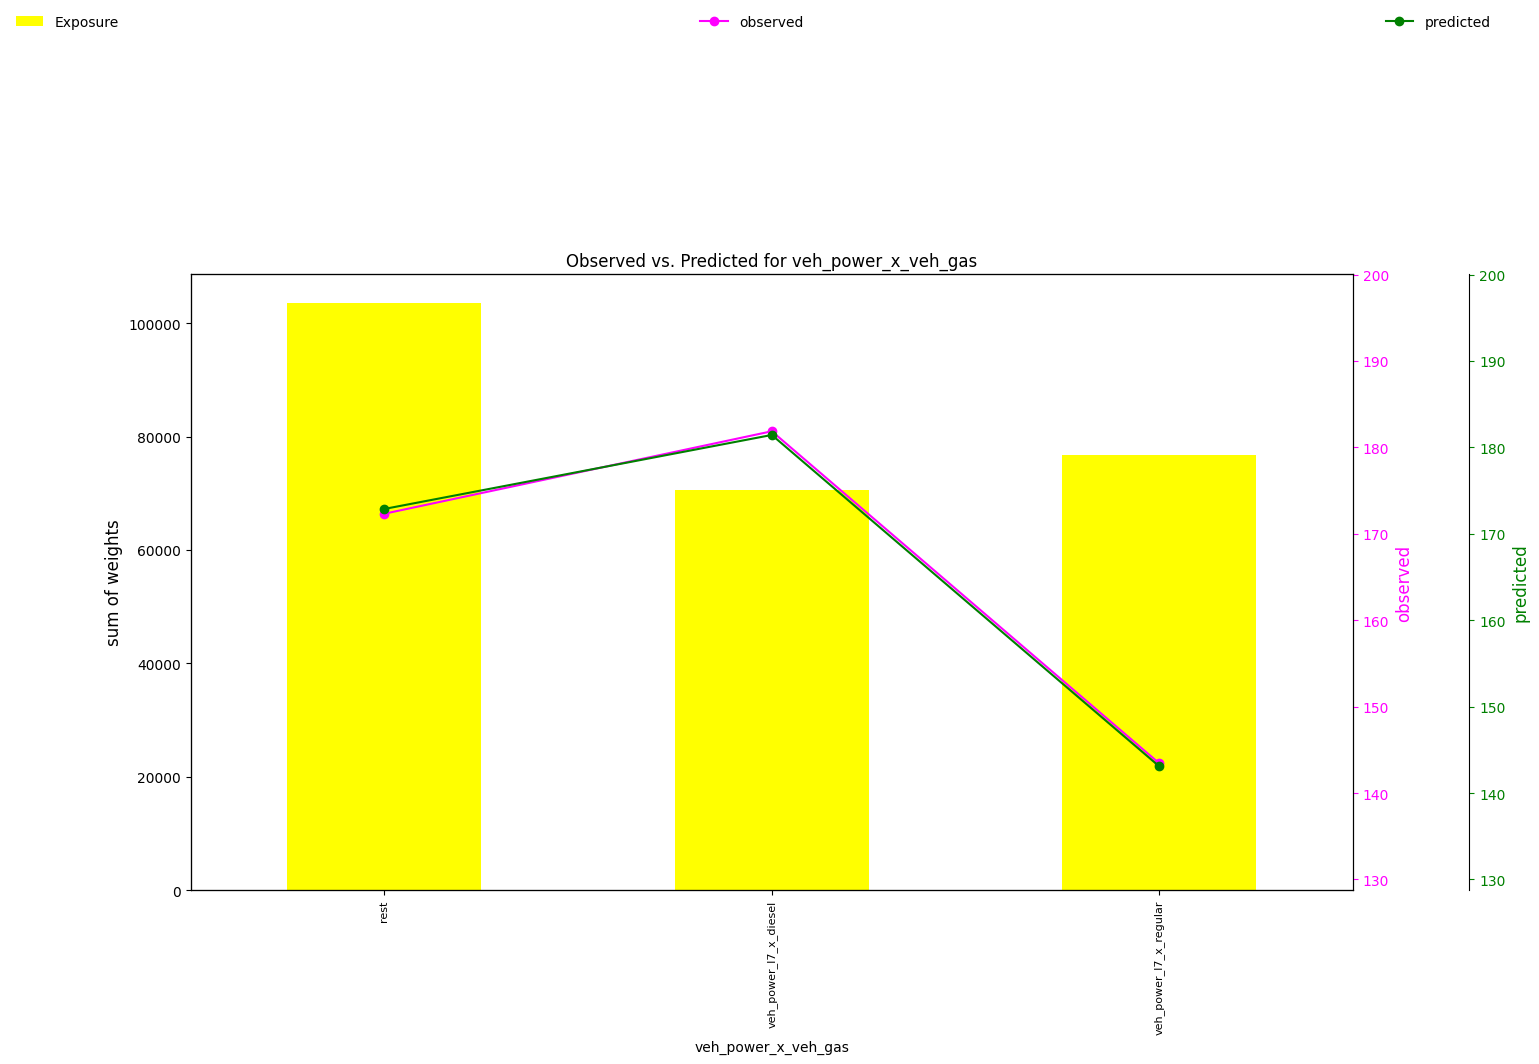

INFO:root:feature: veh_power_x_young_driver_flag


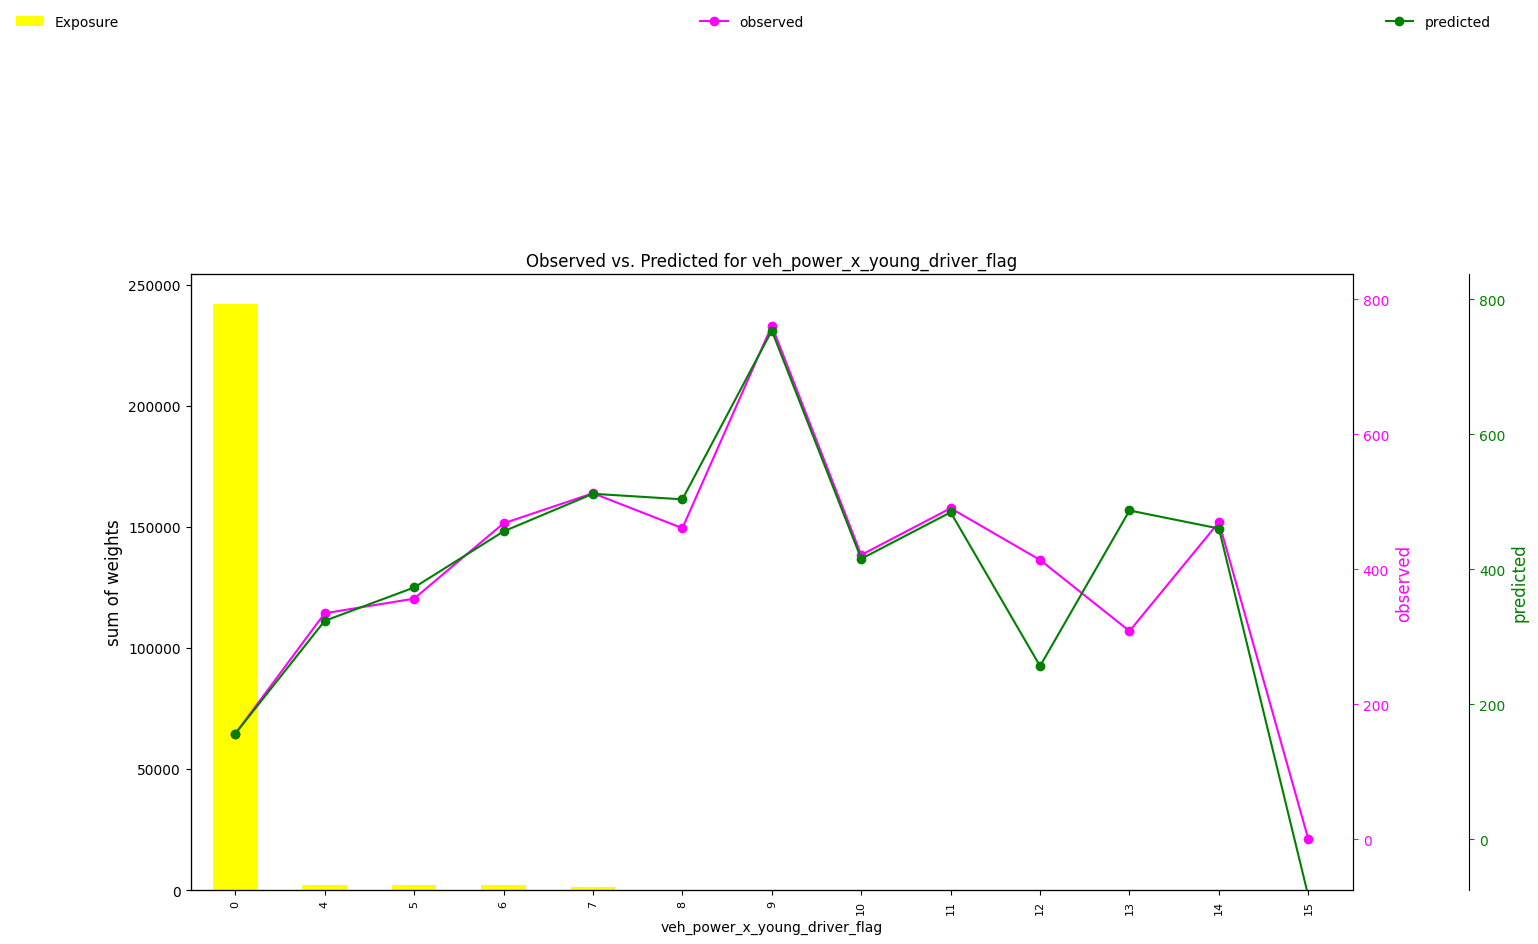

INFO:root:feature: young_driver_flag


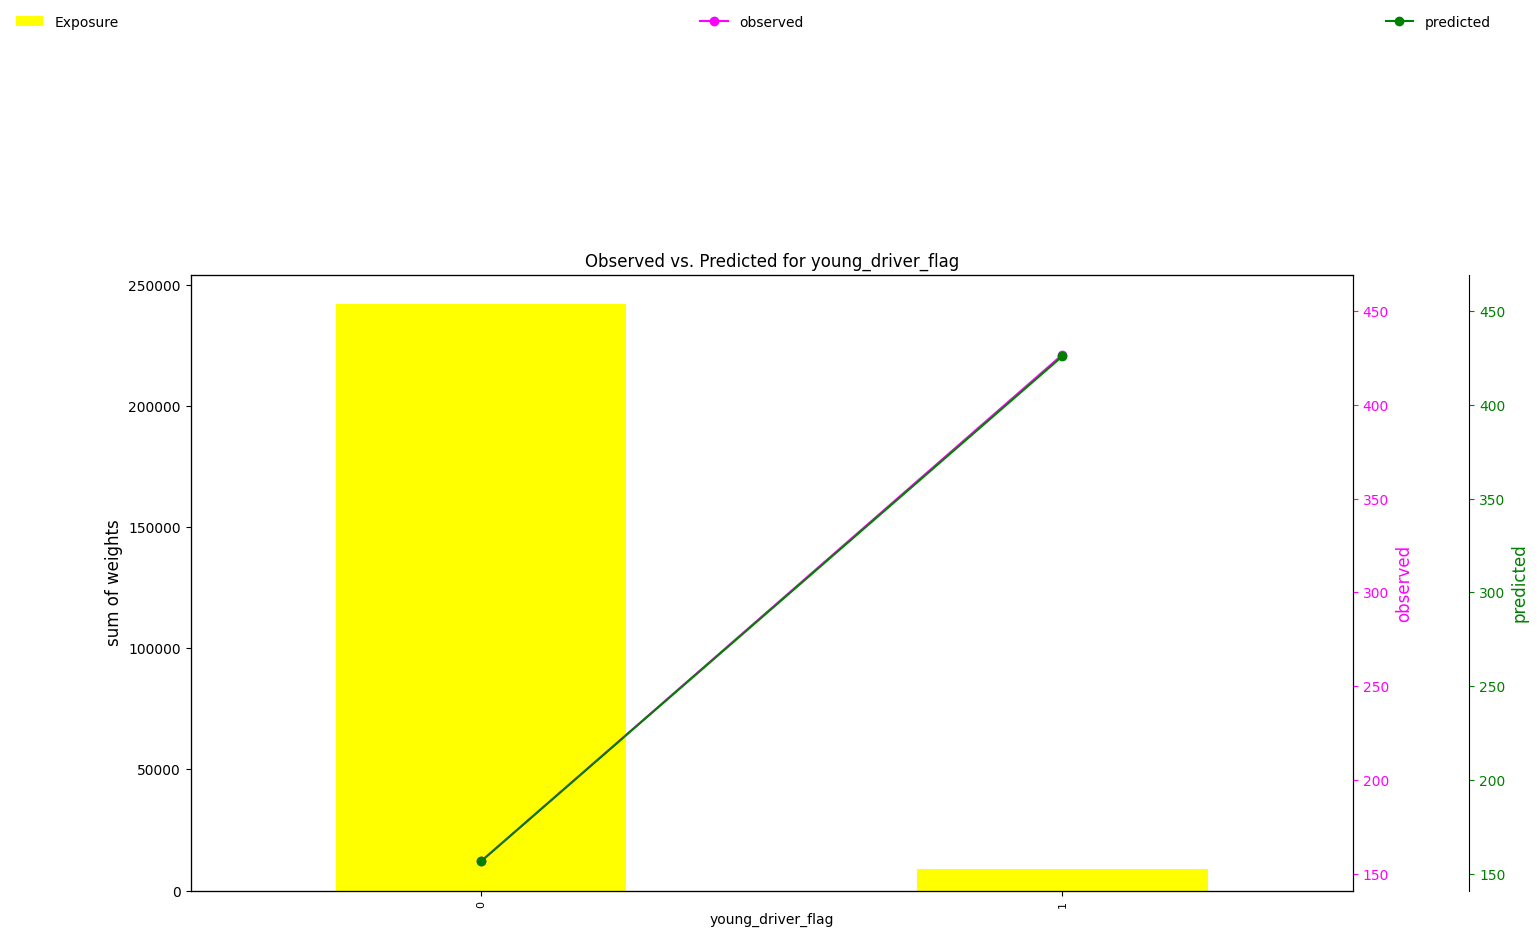

In [4]:
catboost_optimal.plot_results(df_to_plot=catboost_optimal.x_train, cols=cols)

## plot test data

INFO:root:feature: Area


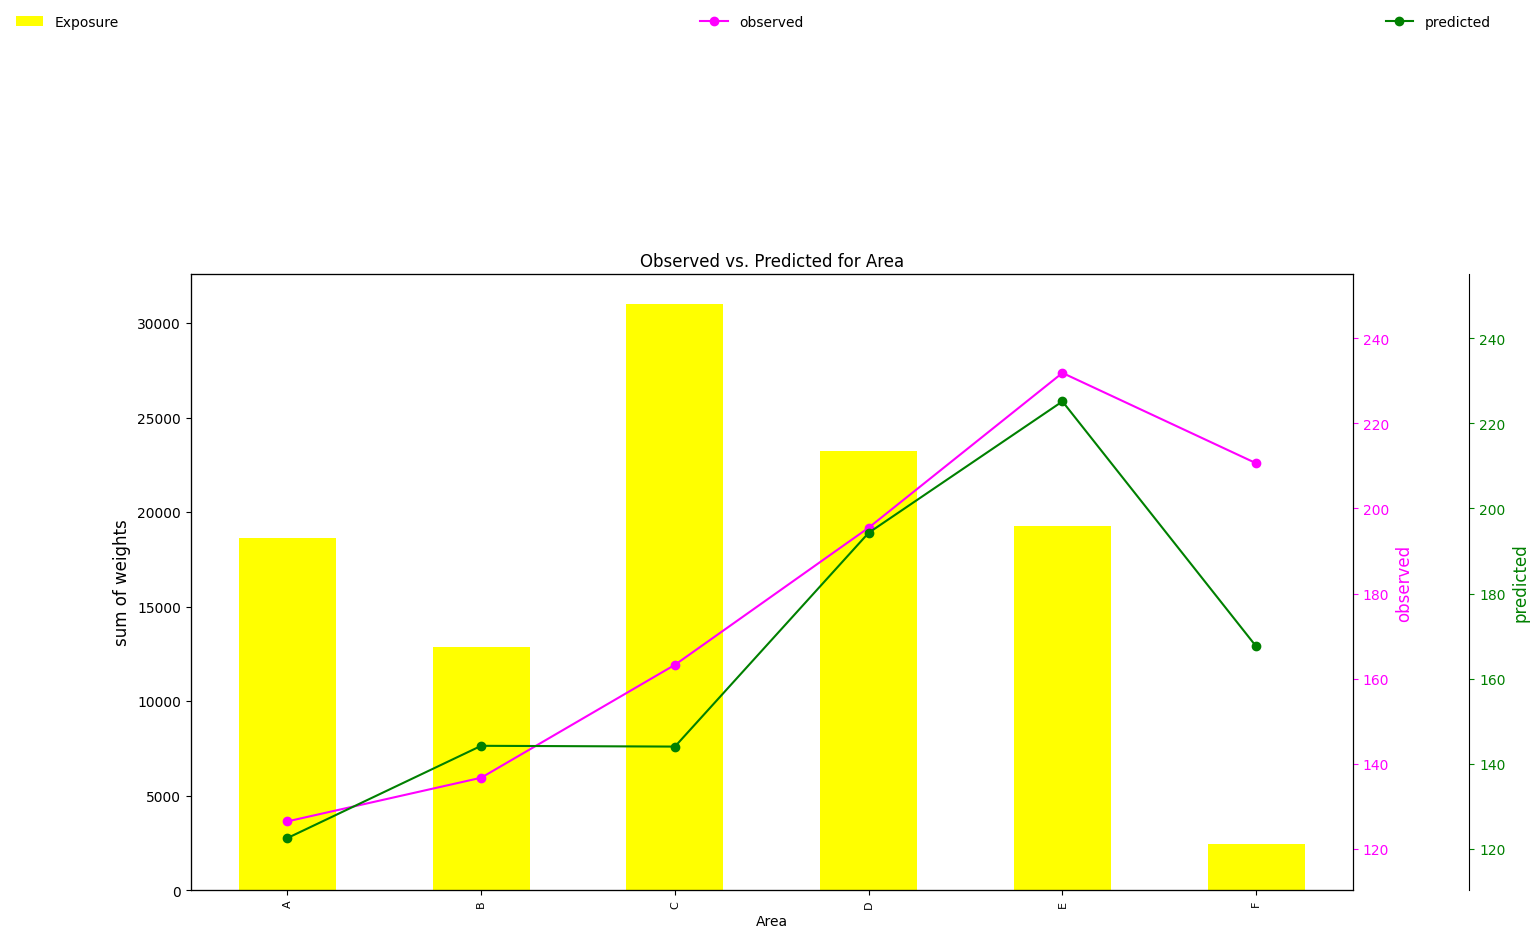

INFO:root:feature: BonusMalus


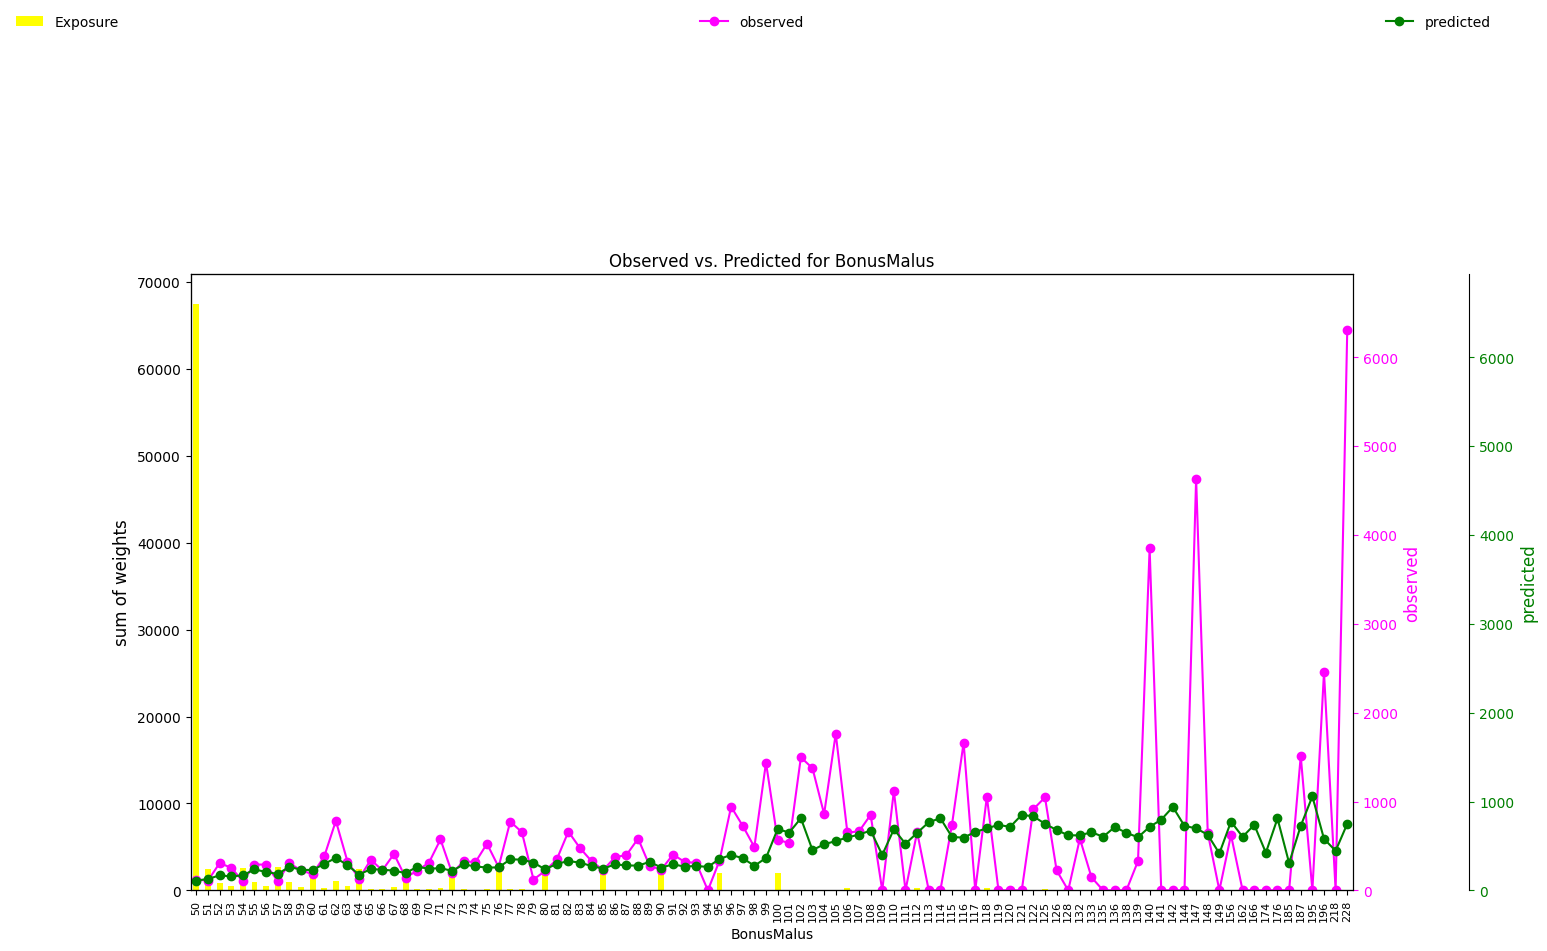

INFO:root:feature: bonus_malus_grouped


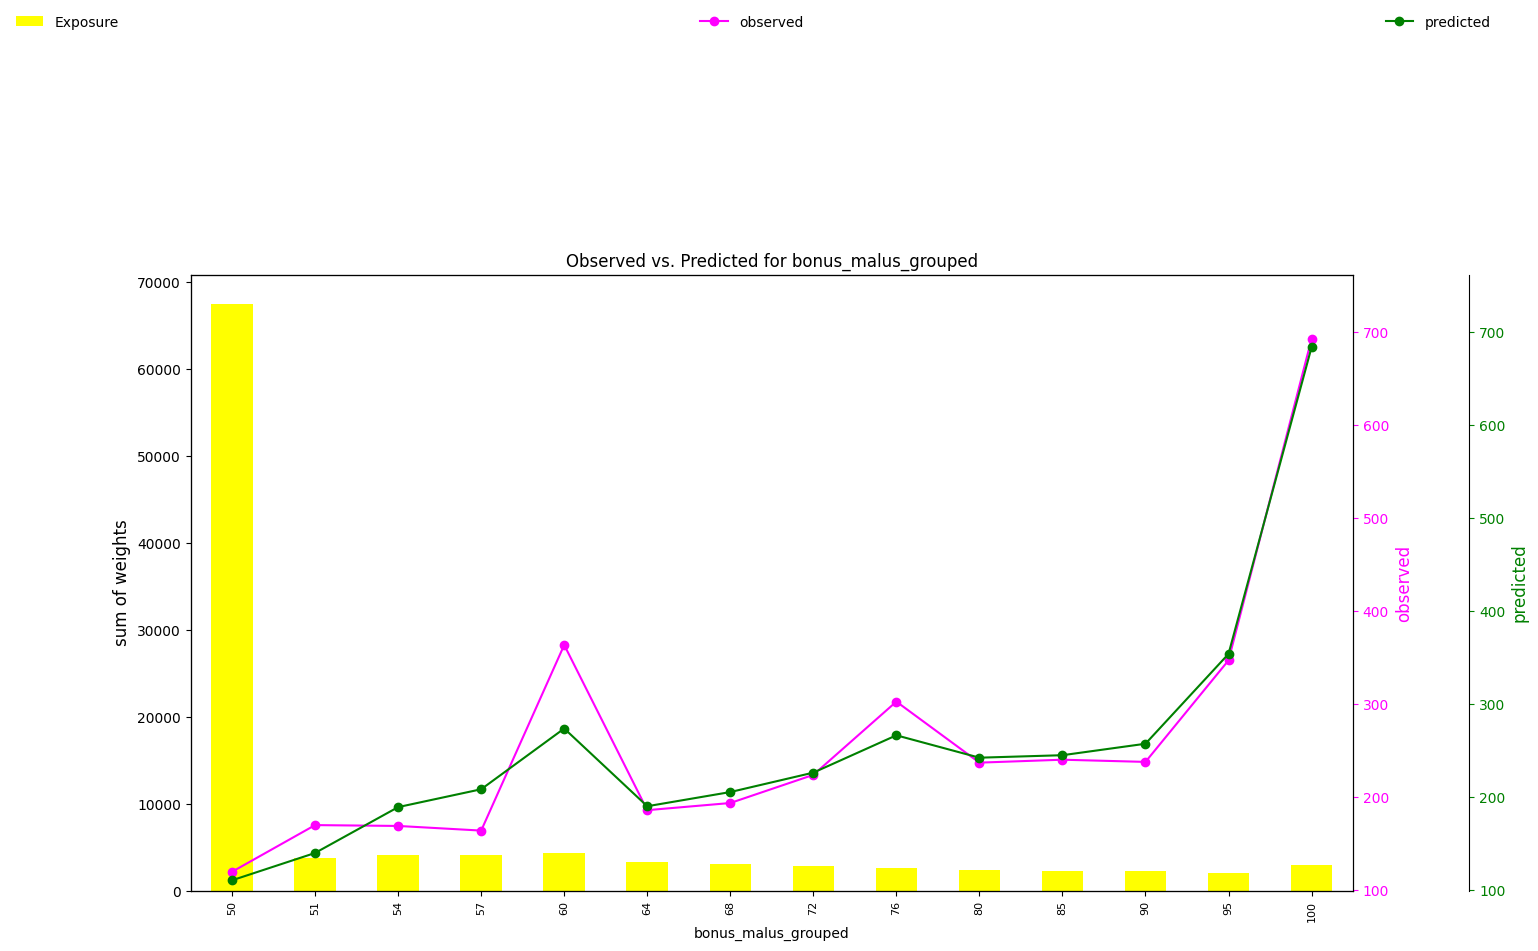

INFO:root:feature: Density


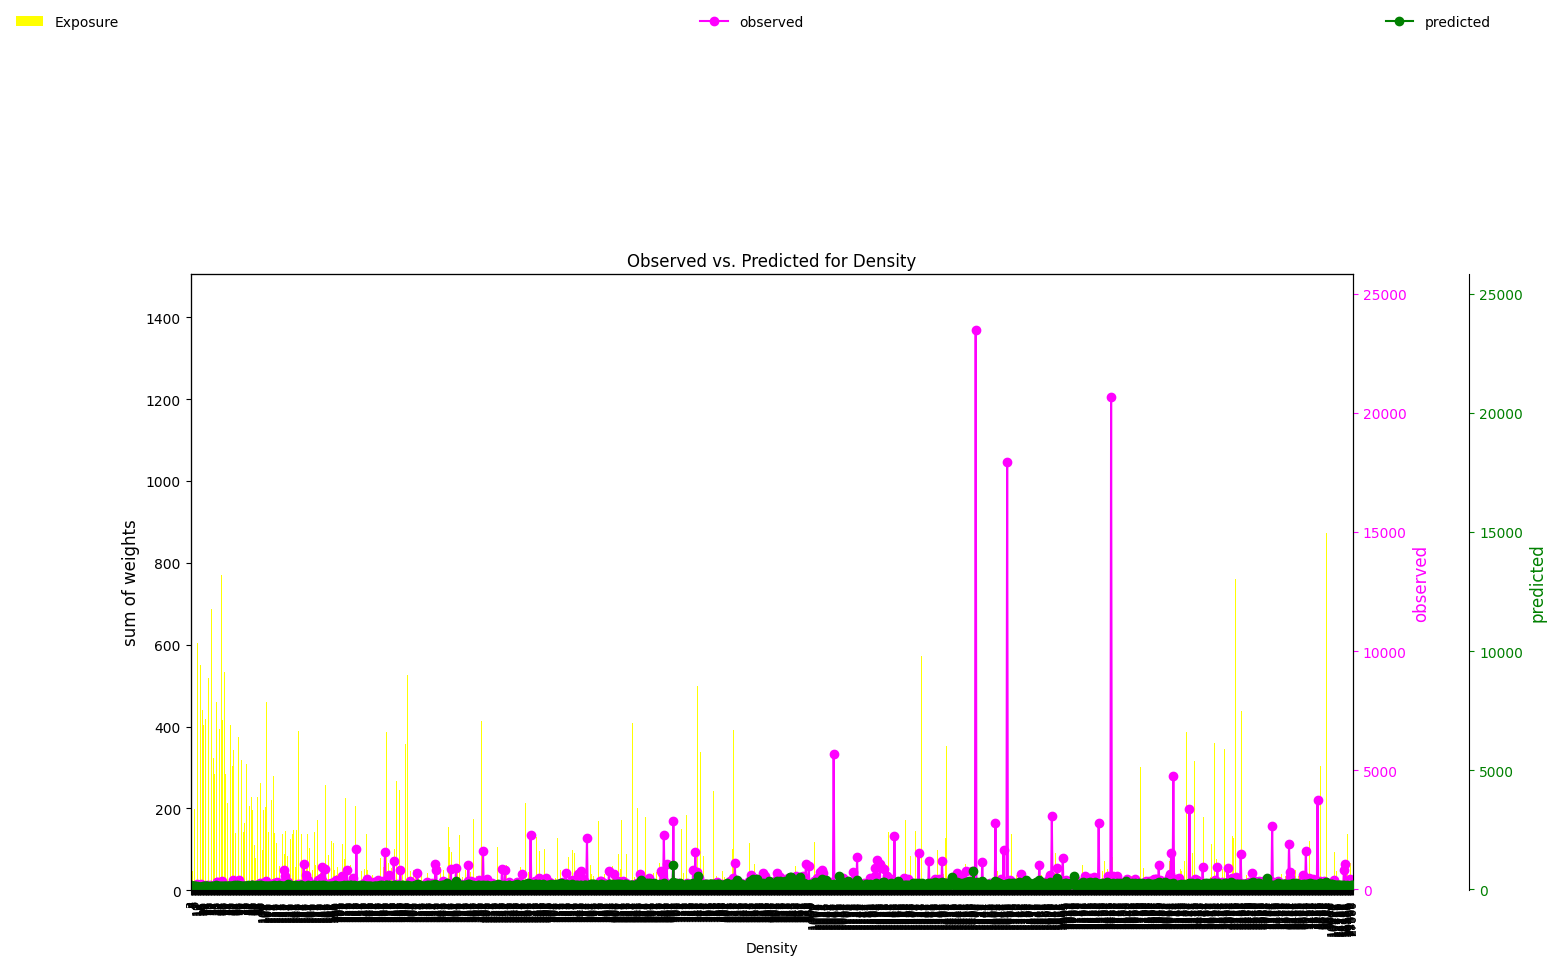

INFO:root:feature: density_grouped


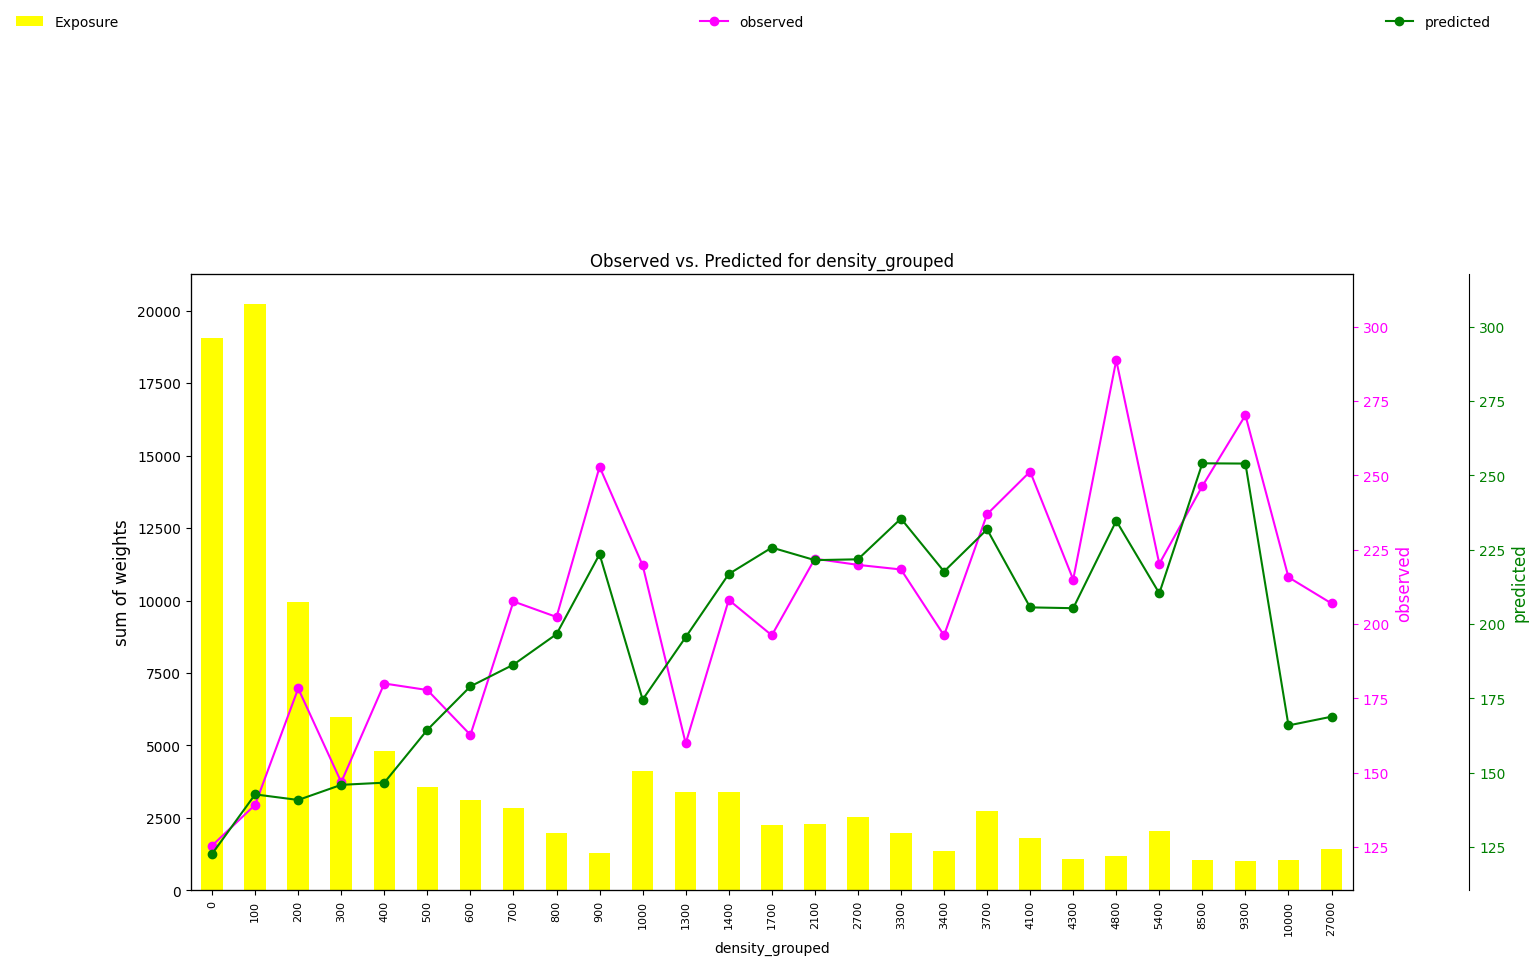

INFO:root:feature: DrivAge


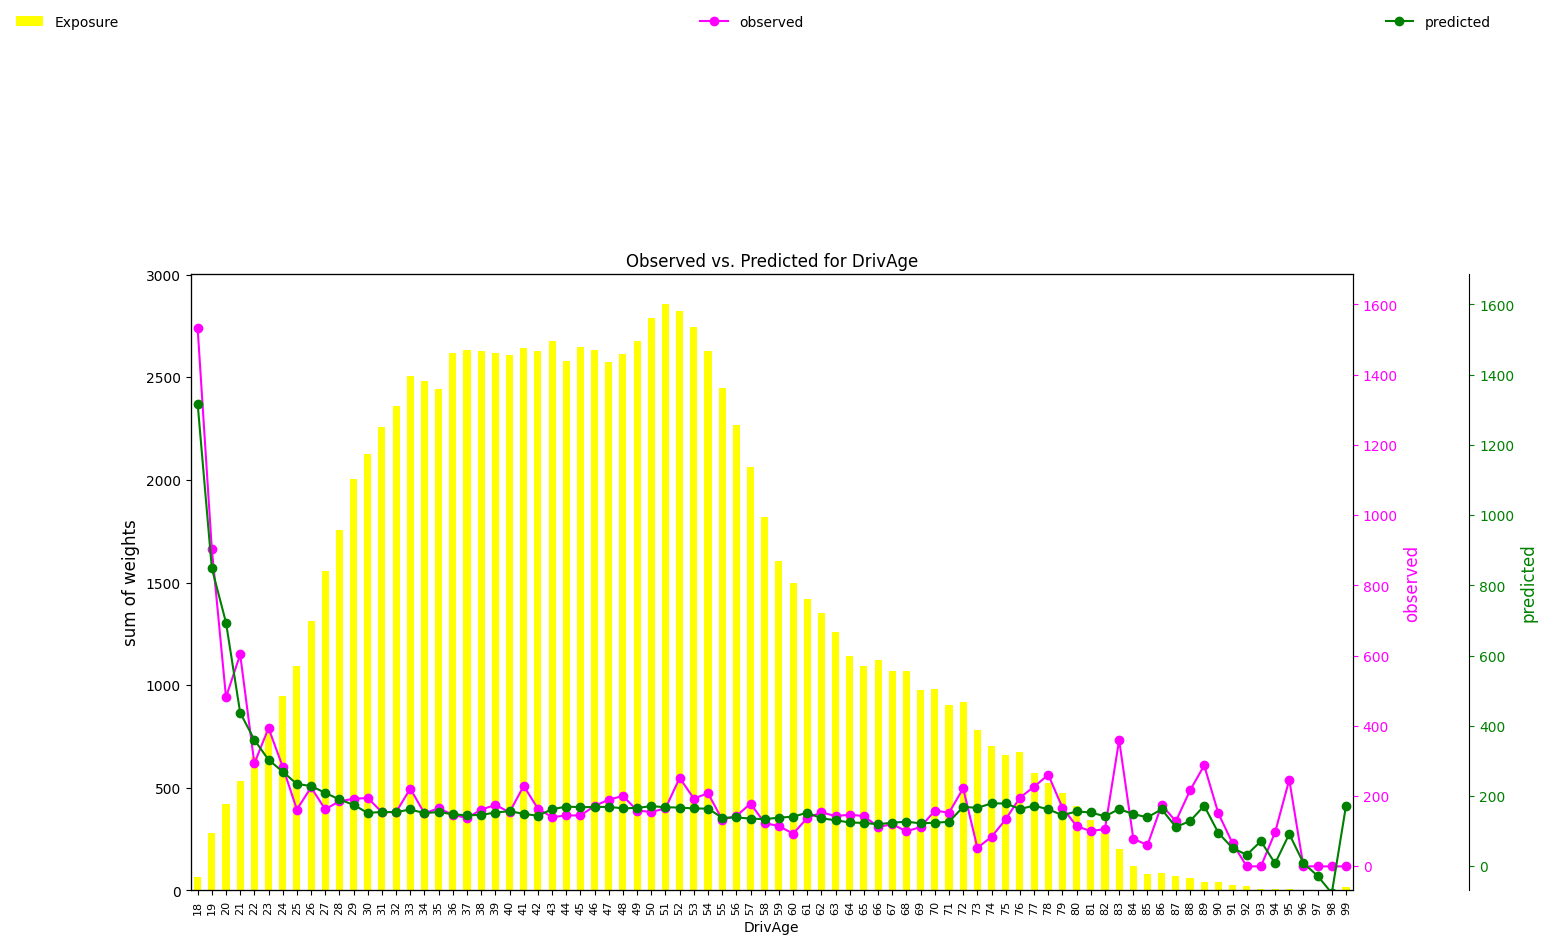

INFO:root:feature: Region


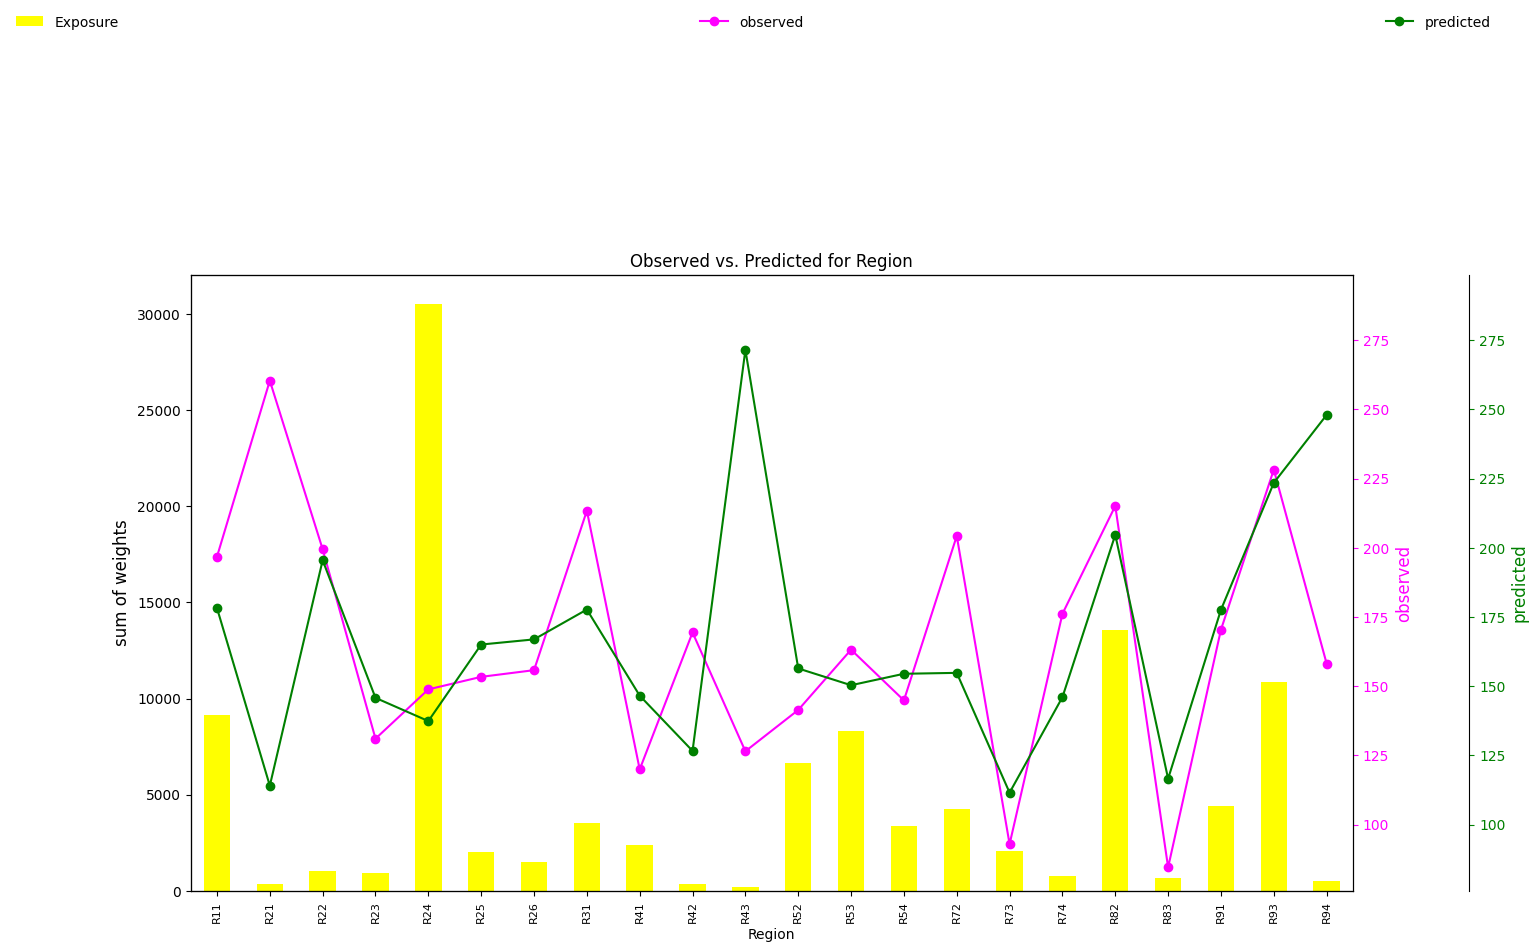

INFO:root:feature: VehAge


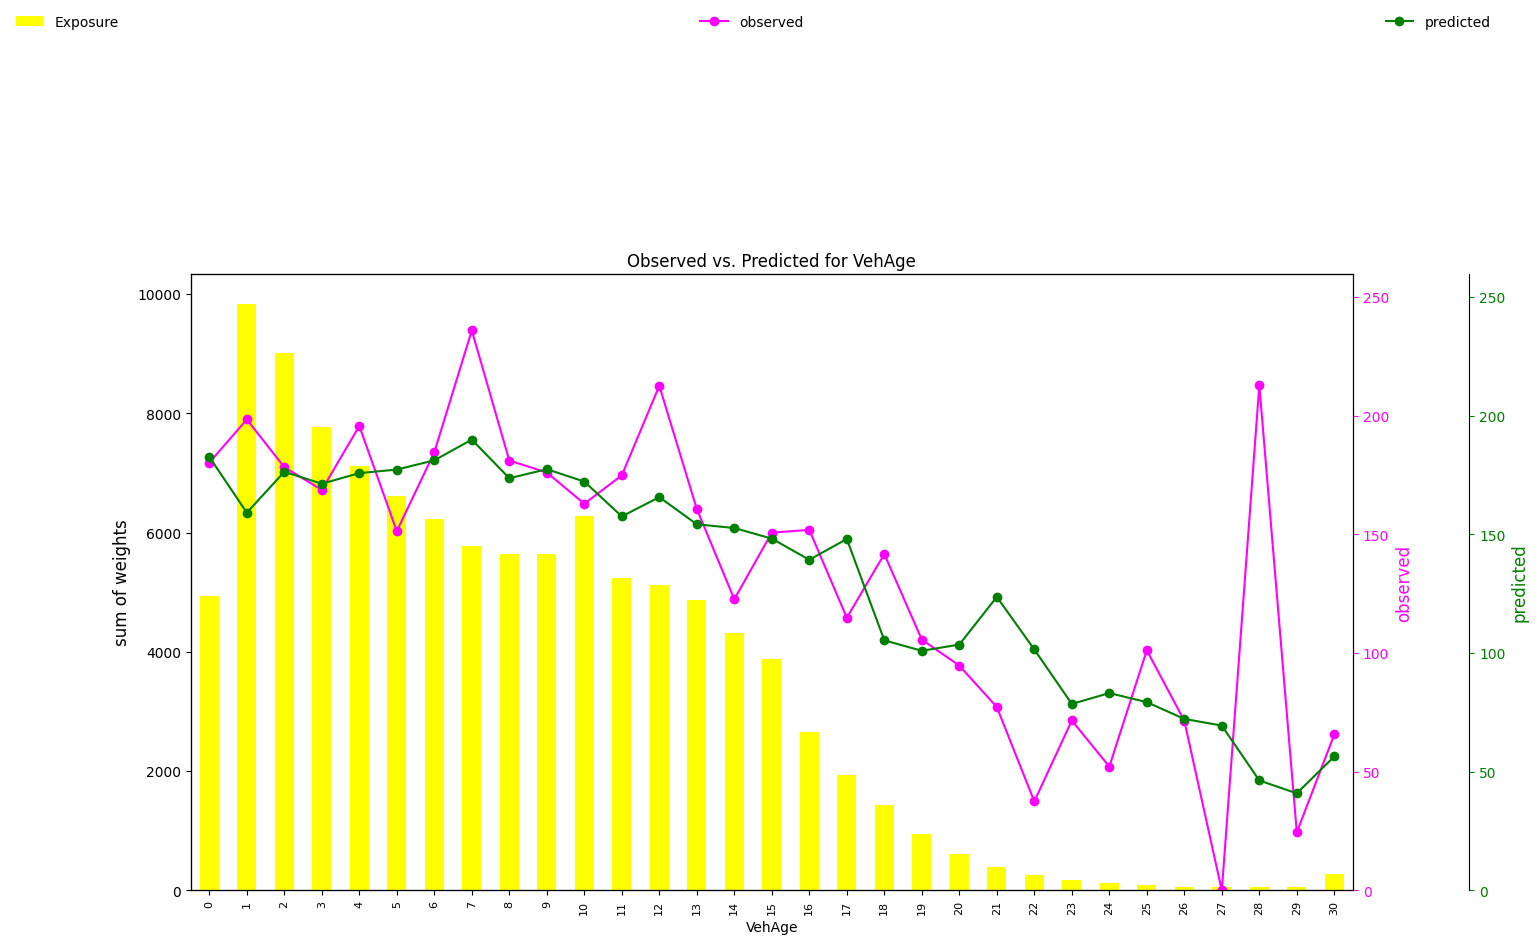

INFO:root:feature: VehBrand


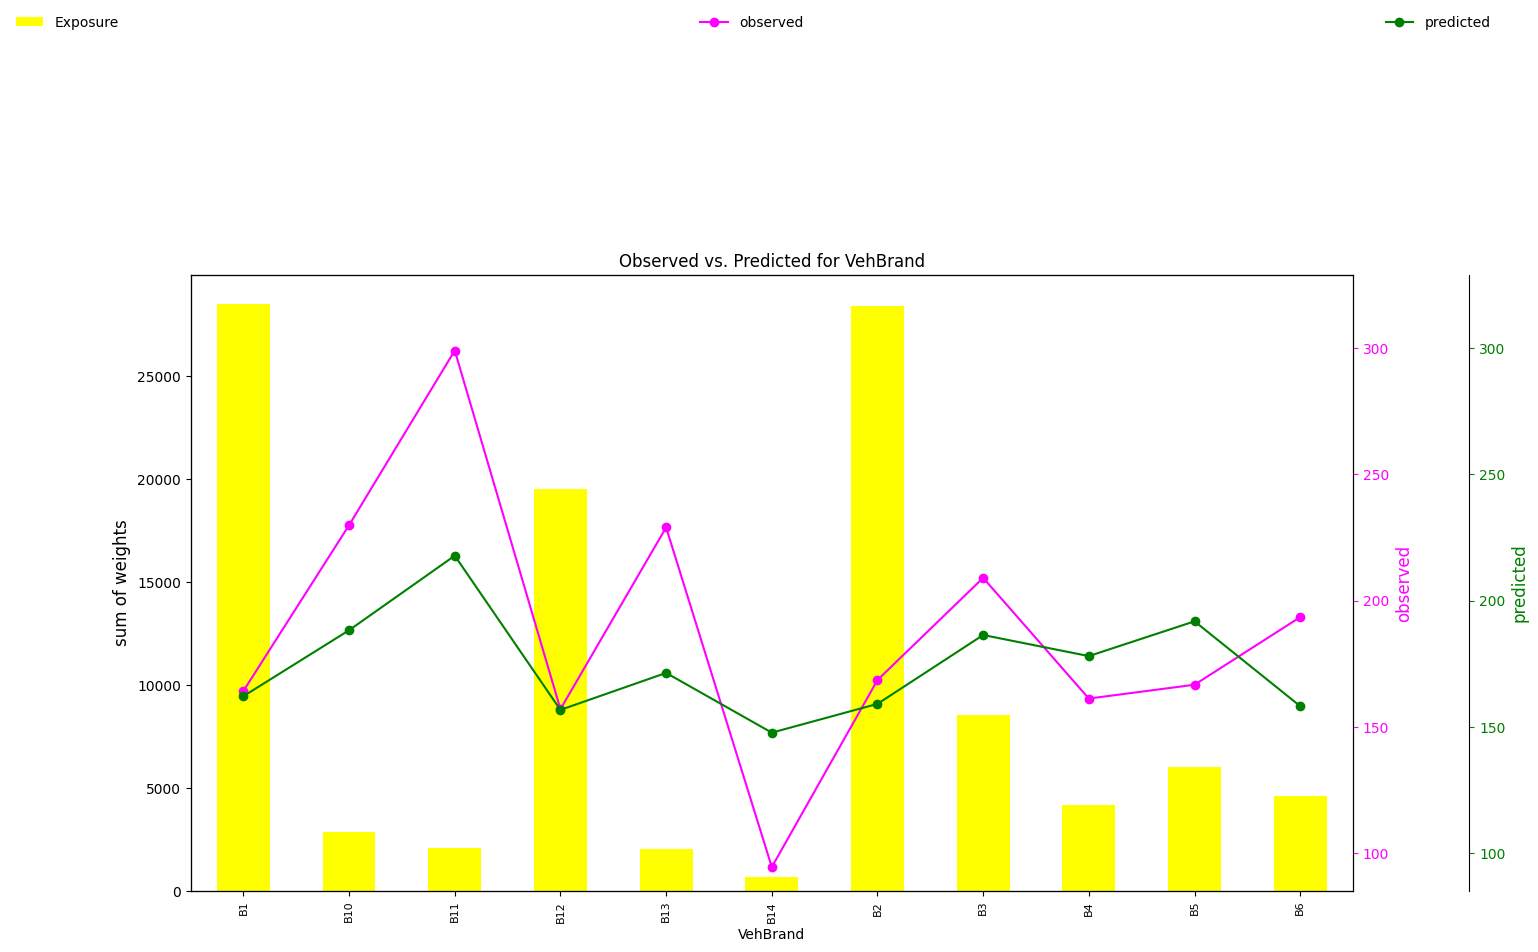

INFO:root:feature: VehGas


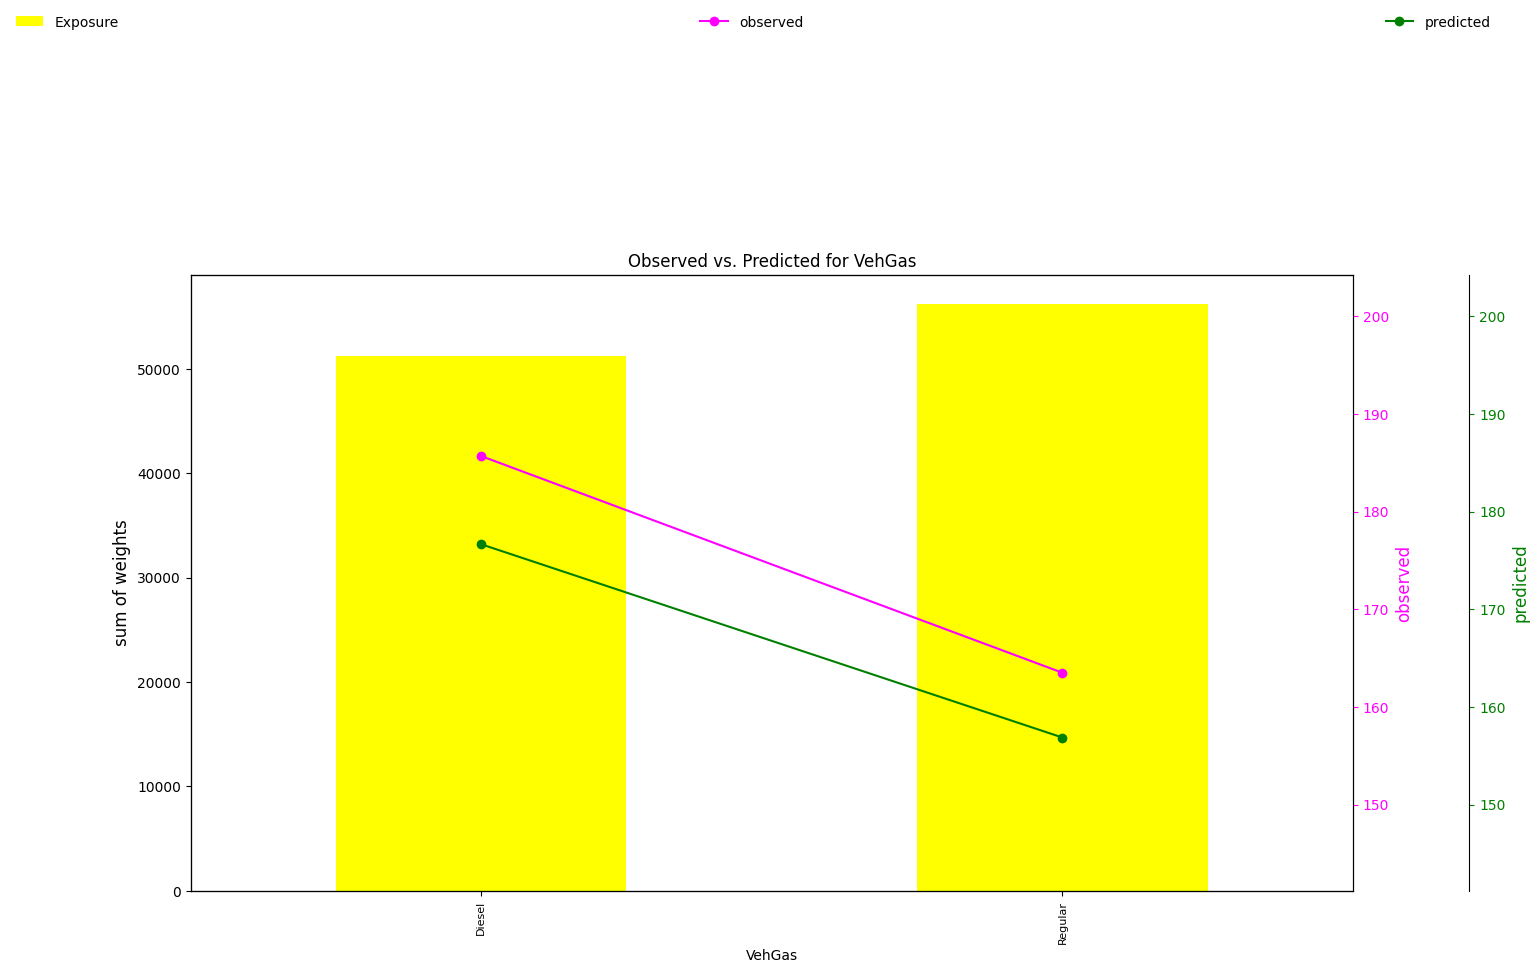

INFO:root:feature: VehPower


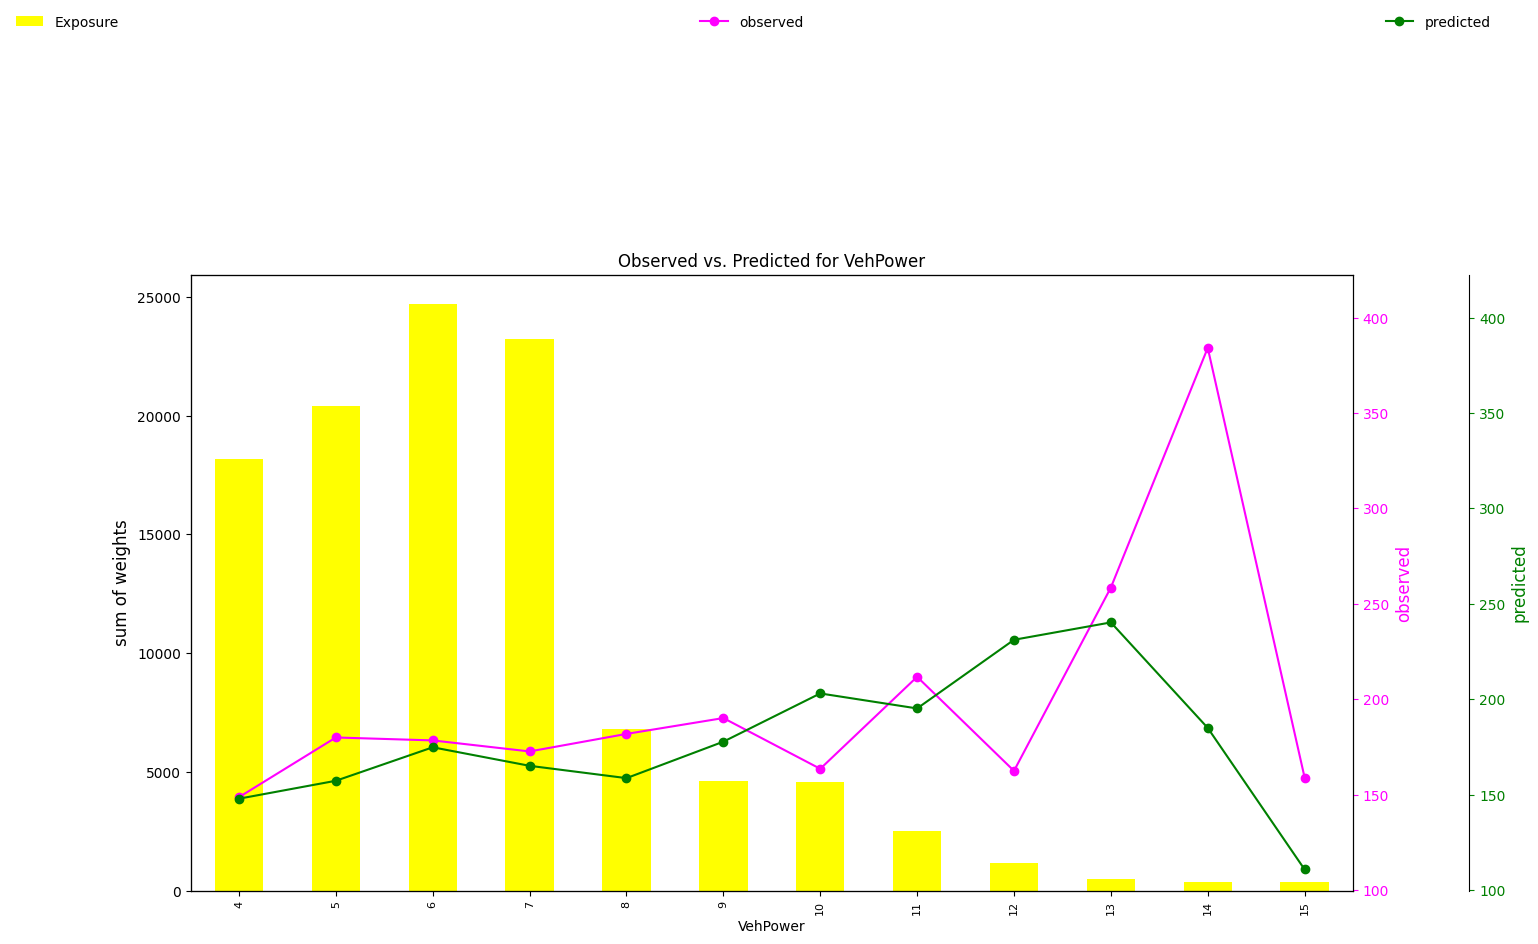

INFO:root:feature: veh_power_x_veh_gas


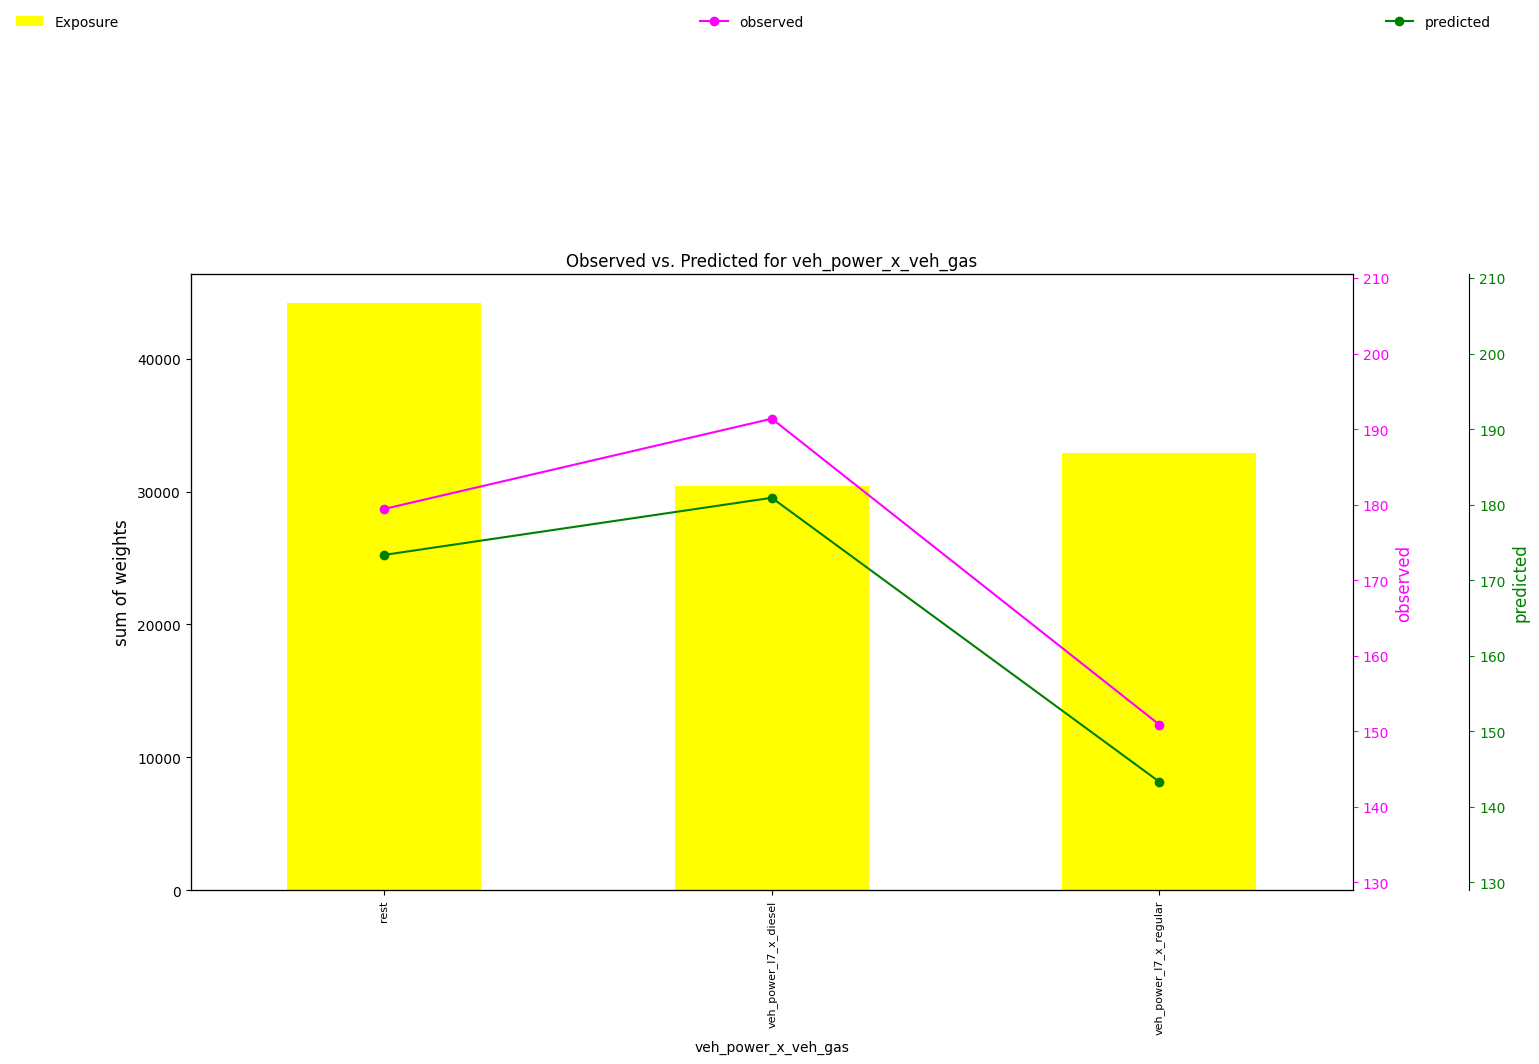

INFO:root:feature: veh_power_x_young_driver_flag


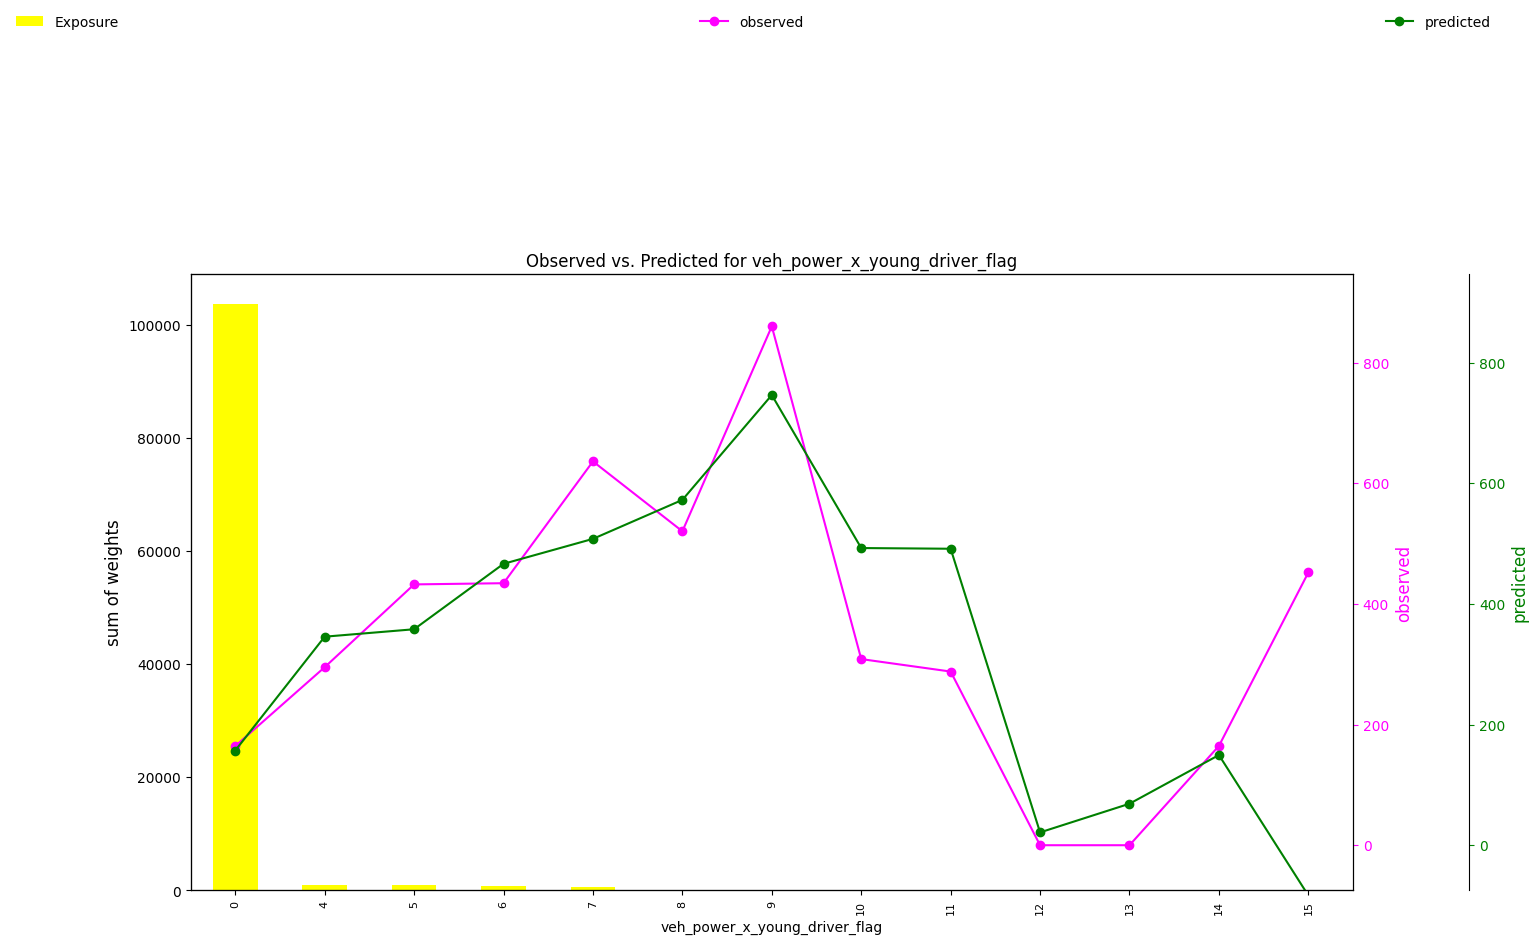

INFO:root:feature: young_driver_flag


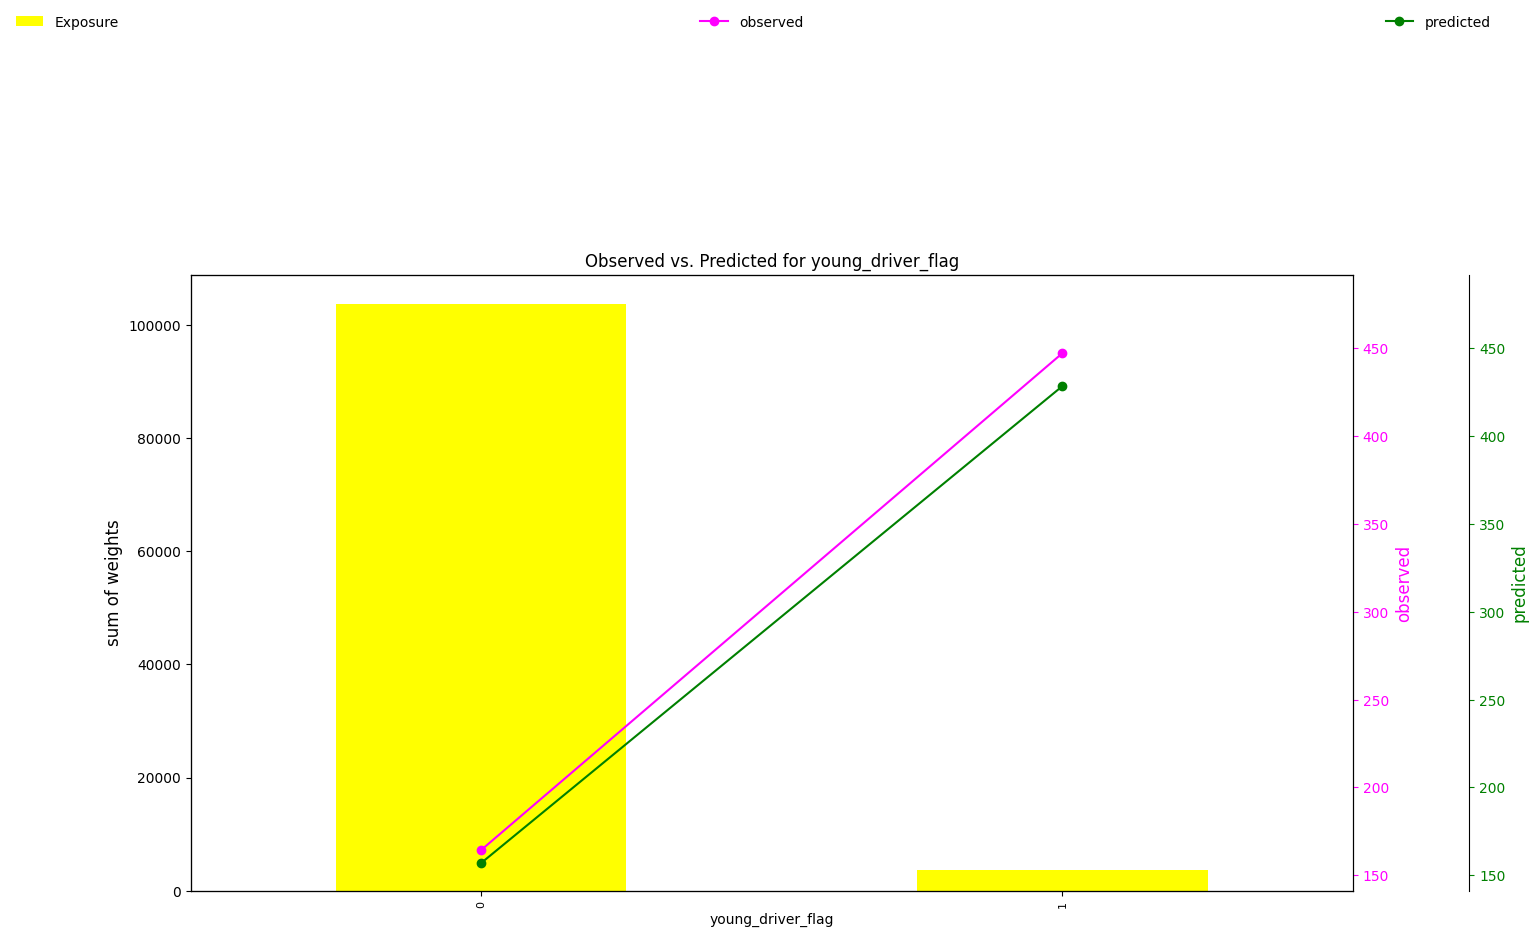

In [5]:
catboost_optimal.plot_results(df_to_plot=catboost_optimal.x_test, cols=cols)

In [9]:
# le fin